In [2]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

### Se agregan al dataframe columnas con el tiempo

In [7]:
# Agregamos nuevas columnas para trabajar mejor con el tiempo. (mes, dia, dia del año)
tf['timestamp_datetime'] = pd.to_datetime(tf['timestamp'])
tf['timestamp_month'] = tf['timestamp_datetime'].dt.month
tf['timestamp_day'] = tf['timestamp_datetime'].dt.day
tf['timestamp_weekday'] = tf['timestamp_datetime'].dt.weekday_name
tf['timestamp_dayofyear'] = tf['timestamp_datetime'].dt.dayofyear

# Convenciones (desp borramos esto) --------------------------------------------------------

Propongo seguir las convenciones, pero hagan lo que prefieran, digo como para desp no tener q acomodar todo al final, conviene ya ir trabajando de la misma forma.

* tf = set de datos

* A la hora de trabajar con un evento ( y quedarse con las filas del dataset en las que esta solo ese evento) podemos tener como convencion poner al dataset nuevo el nombre del evento.
* g para nombre de graficos
* Titulos importantes ej. eventos usar un # y subtitulos ###.
* Ya estan los titulos de todos los eventos, buscar el evento y poner la info de uds. 
* Si hay informacion repetida desp vemos bien que dejamos y que sacamos.


In [6]:
# SE CARGA TROCAFONE SOLO 1 VEZ.

tf = pd.read_csv('./data/events.csv',dtype=object)

# Breve descripcion del dataset.

#### Santi 

In [9]:
# Columnas
tf.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [10]:
tf.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
tf.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


In [12]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [35]:
# Analizo eventos y relacion de estos con otras variables

In [14]:
# Hay eventos nulos en la columna event?
tf['event'].isnull().sum()

0

In [15]:
# Comprobamos si hay alguna fecha nula. 
tf['timestamp'].isnull().any()

False

### Vemos con que podemos relacionar cada evento.
Hay otras columnas que pueden tener algunos elementos null pero pueden servir igual (son pocos).

In [86]:
rel_event = tf.groupby('event').agg(lambda x: x.isnull().sum()).T
rel_event

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
timestamp,0,0,0,0,0,0,0,0,0,0,0
person,0,0,0,0,0,0,0,0,0,0,0
url,71,98635,33735,1172,67534,448,50957,56073,3598,528931,87378
sku,82827,98635,0,0,67534,448,50957,56073,3598,0,87378
model,82827,98635,2,0,67534,0,50957,56073,3598,0,87378
condition,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
storage,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
color,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
skus,82827,311,33735,1172,113,448,50957,119,3598,528931,87378
search_term,82827,98635,33735,1172,67534,448,50957,7106,3598,528931,87378


# Analisis general de eventos 

#### Santi

In [19]:
# Nombres de los eventos.

tf['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

### Ocurrencias de eventos

Text(0,0.5,'Eventos')

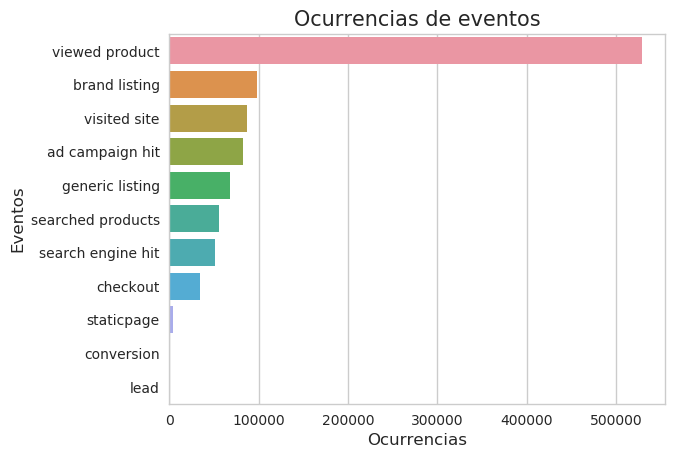

In [28]:
# Ocurrencias de eventos (grafico)

g = sns.barplot(x=tf['event'].value_counts().values, y=tf['event'].value_counts().index, orient='h')
g.set_title("Ocurrencias de eventos", fontsize=15)
g.set_xlabel("Ocurrencias", fontsize=12)
g.set_ylabel("Eventos", fontsize=12)

### Ocurrencia total de eventos por horario

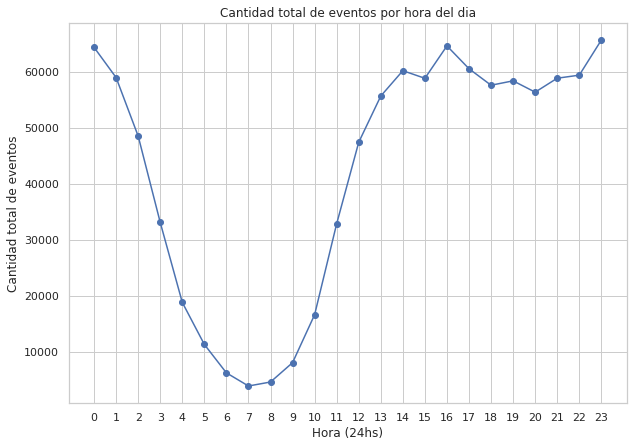

In [16]:
#Seba

tf_hr = tf.filter(items = ['country','timestamp_datetime', 'event'])

tf_hr['hour'] = tf_hr['timestamp_datetime'].dt.hour

g = tf_hr['hour'].value_counts(sort=False).plot(kind='line', figsize=(10, 7), grid=True, style="-o")
g.set(xlabel='Hora (24hs)', ylabel='Cantidad total de eventos', title='Cantidad total de eventos por hora del dia')

plt.xticks(range(0, 24));

In [44]:
# Analizo el evento viewed product y brand listing.

# Viewed product

#### Santi

In [20]:
# Me quedo solo con el evento viewed product.
viewed_product = tf.loc[tf['event'] == 'viewed product']

In [21]:
# Veo si hay algun valor nulo en la columna model.
viewed_product['model'].isnull().sum()

0

### Modelos de celulares mas visitados

In [22]:
# Modelo de celular mas visitado.
viewed_product['model'].value_counts()

iPhone 6                                     47538
iPhone 5s                                    42045
iPhone 6S                                    36930
iPhone 7                                     26330
Samsung Galaxy S7 Edge                       23062
Samsung Galaxy S7                            18085
iPhone 7 Plus                                17853
iPhone SE                                    15874
Samsung Galaxy S8                            15868
iPhone 6S Plus                               12250
iPhone 6 Plus                                12098
iPhone 5c                                    12049
Samsung Galaxy J5                            11036
Samsung Galaxy S6 Flat                       10724
Samsung Galaxy S6 Edge                       10580
Samsung Galaxy S8 Plus                       10006
iPhone 5                                      8846
Samsung Galaxy J7 Prime                       8400
Motorola Moto G4 Plus                         7522
Motorola Moto X Play 4G Dual   

### 15 celulares mas visitados

In [26]:
# 15 celulares mas visitados.
viewed_product['model'].value_counts().head(15)

iPhone 6                  47538
iPhone 5s                 42045
iPhone 6S                 36930
iPhone 7                  26330
Samsung Galaxy S7 Edge    23062
Samsung Galaxy S7         18085
iPhone 7 Plus             17853
iPhone SE                 15874
Samsung Galaxy S8         15868
iPhone 6S Plus            12250
iPhone 6 Plus             12098
iPhone 5c                 12049
Samsung Galaxy J5         11036
Samsung Galaxy S6 Flat    10724
Samsung Galaxy S6 Edge    10580
Name: model, dtype: int64

Text(0,0.5,'Celulares')

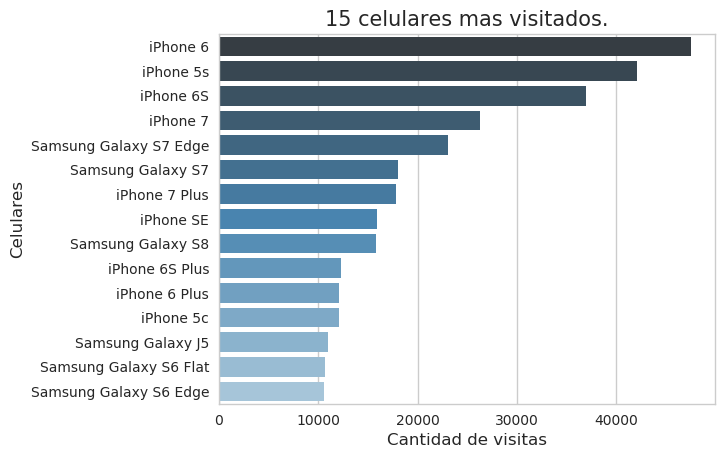

In [29]:
# Grafico de barras de los 15 celulares mas visitados.

g = sns.barplot(x=viewed_product['model'].value_counts().head(15).values, y=viewed_product['model'].value_counts().head(15).index,palette="Blues_d", orient='h')

g.set_title("15 celulares mas visitados.", fontsize=15)
g.set_xlabel("Cantidad de visitas", fontsize=12)
g.set_ylabel("Celulares", fontsize=12)

In [30]:
# Columnas que puedo relacionar con las visitas a los productos (no tienen valores nulos).
viewed_product.dropna(axis = 'columns').columns

Index(['timestamp', 'event', 'person', 'sku', 'model', 'condition', 'storage',
       'color', 'timestamp_datetime', 'timestamp_year', 'timestamp_month',
       'timestamp_day', 'timestamp_weekday', 'timestamp_dayofyear'],
      dtype='object')

### Visitas de cada celular para cada color

In [32]:
# Visitas de cada celular para cada color.
visitas_por_color = viewed_product.groupby(['model','color']).agg({'event':'count'})
visitas_por_color.columns = ['visitas']
visitas_por_color

visitas
model                     color                   
Asus Live                 Preto Azul             4
Asus Zenfone 2            Cinza                 63
                          Dourado               18
                          Preto                 21
                          Vermelho              36
Asus Zenfone 2 Deluxe     Branco               151
                          Roxo                  50
Asus Zenfone 2 Laser      Dourado                1
                          Preto                  5
                          Vermelho               6
Asus Zenfone 3 Max  32 GB Cinza                 23
                          Dourado               86
                          Prata                  9
                          Rosa                   6
Asus Zenfone 3 Max 16 GB  Cinza                 62
                          Dourado               44
                          Prata                 35
Asus Zenfone 3 Zoom       Prata                  1
                          Preto                 40
                          Rosa                   1
Asus Zenfone 5            Branco               140
                          Dourado               12
                          Preto                346
                          Roxo                  59
                          Vermelho             163
Asus Zenfone 6            Branco                96
                          Dourado               35
                          Preto                289
                          Vermelho             163
Asus Zenfone Go           Branco                 2
...                                            ...
iPhone 6S                 Ouro Rosa          10636
                          Prateado            6279
iPhone 6S Plus            Cinza espacial      3497
                          Dourado             2463
                          Ouro Rosa           2861
                          Prateado            3429
iPhone 7                  Dourado             4038
                          Ouro Rosa           6593
                          Prateado            1709
                          Preto Brilhante     3468
                          Preto Matte         9231
                          Vermelho            1291
iPhone 7 Plus             Dourado             2014
                          Ouro Rosa           5521
                          Prateado            1497
                          Preto Brilhante     2332
                          Preto Matte         5722
                          Vermelho             767
iPhone 8                  Cinza espacial       355
                          Dourado              481
                          Prateado             161
iPhone 8 Plus             Cinza espacial       715
                          Dourado              246
                          Prateado             187
iPhone SE                 Cinza espacial      4830
                          Dourado             2990
                          Ouro Rosa           5752
                          Prateado            2302
iPhone X                  Cinza espacial       460
                          Prateado             234

[574 rows x 1 columns]

### Visitas de cada celular para cada capacidad de almacenamiento

In [33]:
# Visitas de cada celular para cada capacidad de almacenamiento.
visitas_por_storage = viewed_product.groupby(['model','storage']).agg({'event':'count'})
visitas_por_storage.columns = ['visitas']
visitas_por_storage

visitas
model                     storage         
Asus Live                 16GB           4
Asus Zenfone 2            16GB          95
                          32GB          35
                          64GB           8
Asus Zenfone 2 Deluxe     128GB        201
Asus Zenfone 2 Laser      16GB          12
Asus Zenfone 3 Max  32 GB 32GB         124
Asus Zenfone 3 Max 16 GB  16GB         141
Asus Zenfone 3 Zoom       128GB          1
                          32GB          16
                          64GB          25
Asus Zenfone 5            8GB          720
Asus Zenfone 6            8GB          583
Asus Zenfone Go           16GB           9
Asus Zenfone Selfie       32GB          49
LG  X Screen              16GB         283
LG G3 Beat D724           8GB          304
LG G3 D855                16GB        1065
LG G3 Stylus D690         8GB          251
LG G4 Beat H736           8GB          312
LG G4 H815P               32GB         539
LG G4 H818P               32GB        1266
LG G4 Stylus H630         16GB         106
LG G4 Stylus HDTV H540T   16GB         133
LG G5 SE                  32GB        1143
LG G6                     32GB          93
LG K10                    16GB         236
LG K10 Novo               32GB         816
LG K10 TV                 16GB         795
LG K4                     8GB           53
...                                    ...
iPhone 6                  128GB       6218
                          16GB       25915
                          64GB       15405
iPhone 6 Plus             128GB       1015
                          16GB        7080
                          64GB        4003
iPhone 6S                 128GB       3506
                          16GB       16530
                          32GB        5563
                          64GB       11331
iPhone 6S Plus            128GB       1989
                          16GB        5111
                          32GB        1055
                          64GB        4095
iPhone 7                  128GB      11175
                          256GB       2187
                          32GB       12968
iPhone 7 Plus             128GB       9797
                          256GB       2840
                          32GB        5216
iPhone 8                  256GB        372
                          64GB         625
iPhone 8 Plus             256GB        595
                          64GB         553
iPhone SE                 128GB        512
                          16GB        7075
                          32GB        1592
                          64GB        6695
iPhone X                  256GB        556
                          64GB         138

[281 rows x 1 columns]

### Visitas de cada celular para cada condicion de producto

In [34]:
# Visitas de cada celular para cada condicion de producto.
visitas_por_condition = viewed_product.groupby(['model','condition']).agg({'event':'count'})
visitas_por_condition.columns = ['visitas']
visitas_por_condition

visitas
model                     condition                  
Asus Live                 Excelente                 4
Asus Zenfone 2            Bom                      73
                          Excelente                25
                          Muito Bom                40
Asus Zenfone 2 Deluxe     Bom                      13
                          Excelente                30
                          Muito Bom               158
Asus Zenfone 2 Laser      Bom                       6
                          Excelente                 2
                          Muito Bom                 4
Asus Zenfone 3 Max  32 GB Bom                       7
                          Excelente                18
                          Muito Bom                99
Asus Zenfone 3 Max 16 GB  Bom                      37
                          Excelente                40
                          Muito Bom                64
Asus Zenfone 3 Zoom       Bom                       1
                          Excelente                10
                          Muito Bom                31
Asus Zenfone 5            Bom                     203
                          Excelente               336
                          Muito Bom               181
Asus Zenfone 6            Bom                     136
                          Excelente               217
                          Muito Bom               230
Asus Zenfone Go           Excelente                 4
                          Muito Bom                 5
Asus Zenfone Selfie       Bom                      24
                          Excelente                 5
                          Muito Bom                20
...                                               ...
iPhone 6 Plus             Bom - Sem Touch ID       26
                          Excelente              3249
                          Muito Bom              4185
iPhone 6S                 Bom                   13295
                          Bom - Sem Touch ID      426
                          Excelente             11571
                          Muito Bom             11638
iPhone 6S Plus            Bom                    5388
                          Bom - Sem Touch ID       23
                          Excelente              3701
                          Muito Bom              3138
iPhone 7                  Bom                   10508
                          Excelente              7701
                          Muito Bom              8121
iPhone 7 Plus             Bom                    4919
                          Excelente              7218
                          Muito Bom              5716
iPhone 8                  Bom                     150
                          Excelente               558
                          Muito Bom               289
iPhone 8 Plus             Bom                     114
                          Excelente               733
                          Muito Bom               301
iPhone SE                 Bom                    5165
                          Bom - Sem Touch ID      568
                          Excelente              5249
                          Muito Bom              4892
iPhone X                  Bom                      58
                          Excelente               356
                          Muito Bom               280

[578 rows x 1 columns]

### 5 celulares mas visitados y su almacenamiento

In [23]:
cel_mas_visitados = ['iPhone 6','iPhone 5s','iPhone 6S','iPhone 7', 'Samsung Galaxy S7 Edge']
cel_mas_visitados_por_storage = viewed_product[['model','storage']].loc[viewed_product['model'].isin(cel_mas_visitados)]
cel_mas_visitados_por_storage = pd.crosstab(cel_mas_visitados_por_storage.model,cel_mas_visitados_por_storage.storage)
cel_mas_visitados_por_storage

storage,128GB,16GB,256GB,32GB,64GB
model,,,,,
Samsung Galaxy S7 Edge,1758,0,0,21304,0
iPhone 5s,0,22080,0,11626,8339
iPhone 6,6218,25915,0,0,15405
iPhone 6S,3506,16530,0,5563,11331
iPhone 7,11175,0,2187,12968,0


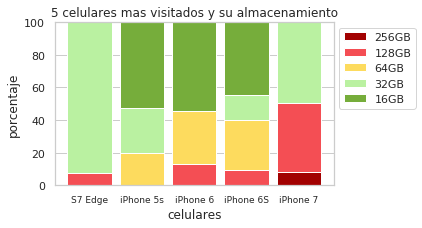

In [24]:
r = [0,1,2,3,4]
cmvps = cel_mas_visitados_por_storage

totals = [i+j+k+l+m for i,j,k,l,m in zip(cmvps['128GB'], cmvps['16GB'],\
                                         cmvps['256GB'], cmvps['32GB'], cmvps['64GB'])]
celcon128 = [i / j * 100 for i,j in zip(cmvps['128GB'], totals)]
celcon16 = [i / j * 100 for i,j in zip(cmvps['16GB'], totals)]
celcon256 = [i / j * 100 for i,j in zip(cmvps['256GB'], totals)]
celcon32 = [i / j * 100 for i,j in zip(cmvps['32GB'], totals)]
celcon64 = [i / j * 100 for i,j in zip(cmvps['64GB'], totals)]

barWidth = 0.85
names = ('S7 Edge','iPhone 5s','iPhone 6','iPhone 6S','iPhone 7')

plt.figure(figsize=(5,3))

plt.bar(r, celcon256, color='#A20101', edgecolor='white', width=barWidth, label = '256GB')

plt.bar(r, celcon128, bottom=celcon256, color='#F44E54', edgecolor='white', width=barWidth, label = '128GB')

plt.bar(r, celcon64, bottom=[i+j for i,j in zip(celcon256, celcon128)], color='#FDDB5E', edgecolor='white'\
                                                , width=barWidth, label = '64GB')

plt.bar(r, celcon32, bottom=[i+j+k for i,j,k in zip(celcon256, celcon128,celcon64)], color='#BAF1A1'\
                                                    , edgecolor='white', width=barWidth, label = '32GB')

plt.bar(r, celcon16, bottom=[i+j+k+l for i,j,k,l in zip(celcon256, celcon128,celcon64,celcon32)], color='#76AD3B'\
                                                        , edgecolor='white', width=barWidth, label = '16GB')

plt.xticks(r, names,fontsize=9)
plt.title('5 celulares mas visitados y su almacenamiento')
plt.xlabel('celulares')
plt.ylabel('porcentaje')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
plt.show()

### 5 iPhones mas visitados y su color

In [25]:
cel_mas_visitados_por_color = viewed_product[['model','color']].loc[viewed_product['model'].isin(['iPhone 5s','iPhone 6','iPhone 6S','iPhone 7','iPhone 7 Plus'])]
cel_mas_visitados_por_color = pd.crosstab(cel_mas_visitados_por_color.model,cel_mas_visitados_por_color.color)
cel_mas_visitados_por_color

color,Cinza espacial,Dourado,Ouro Rosa,Prateado,Preto Brilhante,Preto Matte,Vermelho
model,,,,,,,
iPhone 5s,16745,11230,0,14070,0,0,0
iPhone 6,19306,14126,0,14106,0,0,0
iPhone 6S,11046,8969,10636,6279,0,0,0
iPhone 7,0,4038,6593,1709,3468,9231,1291
iPhone 7 Plus,0,2014,5521,1497,2332,5722,767


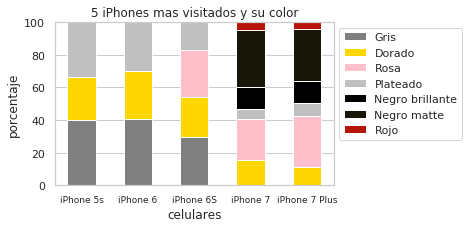

In [26]:
r = [0,1,2,3,4]
cmvpc = cel_mas_visitados_por_color

totals = [i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(cmvpc['Cinza espacial']\
                                                 , cmvpc['Dourado'],cmvpc['Ouro Rosa'], cmvpc['Prateado']\
                                                 , cmvpc['Preto Brilhante'],cmvpc['Preto Matte'],cmvpc['Vermelho'])]

celconCinza = [i / j * 100 for i,j in zip(cmvpc['Cinza espacial'], totals)]
celconDourado = [i / j * 100 for i,j in zip(cmvpc['Dourado'], totals)]
celconRosa = [i / j * 100 for i,j in zip(cmvpc['Ouro Rosa'], totals)]
celconPrateado = [i / j * 100 for i,j in zip(cmvpc['Prateado'], totals)]
celconBrilhante = [i / j * 100 for i,j in zip(cmvpc['Preto Brilhante'], totals)]
celconMatte = [i / j * 100 for i,j in zip(cmvpc['Preto Matte'], totals)]
celconVermelho = [i / j * 100 for i,j in zip(cmvpc['Vermelho'], totals)]

barWidth = 0.5
names = ('iPhone 5s','iPhone 6','iPhone 6S','iPhone 7','iPhone 7 Plus')

plt.figure(figsize=(5,3))

plt.bar(r, celconCinza, color='gray', edgecolor='white', width=barWidth, label = 'Gris')

plt.bar(r, celconDourado, bottom=celconCinza, color='gold', edgecolor='white', width=barWidth, label = 'Dorado')

plt.bar(r, celconRosa, bottom=[i+j for i,j in zip(celconCinza, celconDourado)], color='pink', edgecolor='white', width=barWidth, label = 'Rosa')

plt.bar(r, celconPrateado, bottom=[i+j+k for i,j,k in zip(celconCinza, celconDourado,celconRosa)], color='silver', edgecolor='white', width=barWidth, label = 'Plateado')

plt.bar(r, celconBrilhante, bottom=[i+j+k+l for i,j,k,l in zip(celconCinza, celconDourado,celconRosa,celconPrateado)], color='black', edgecolor='white', width=barWidth, label = 'Negro brillante')

plt.bar(r, celconMatte, bottom=[i+j+k+l+m for i,j,k,l,m in zip(celconCinza, celconDourado,celconRosa,celconPrateado,celconBrilhante)], color='#181609', edgecolor='white', width=barWidth, label = 'Negro matte')

plt.bar(r, celconVermelho, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(celconCinza, celconDourado,celconRosa,celconPrateado,celconBrilhante,celconMatte)], color='#b61609', edgecolor='white', width=barWidth, label = 'Rojo')




plt.xticks(r, names,fontsize=9)
plt.title('5 iPhones mas visitados y su color')
plt.xlabel('celulares')
plt.ylabel('porcentaje')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
plt.show()


### Cantidad total de visitas por dia de la semana 

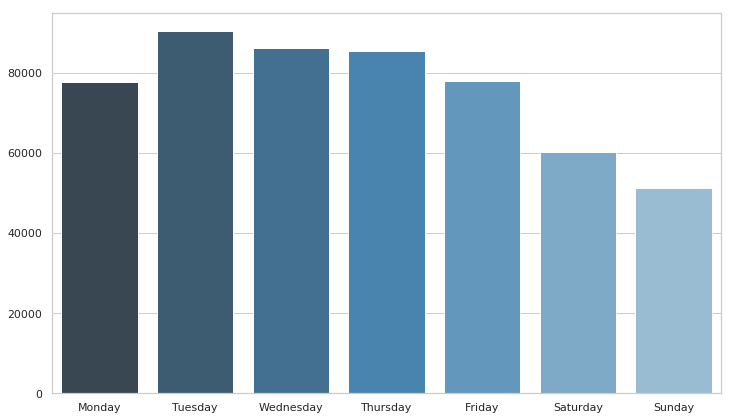

In [60]:
#seba

fig, ax = plt.subplots(figsize=(12,7))

dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

total = viewed_product['timestamp_weekday'].value_counts().reindex(dias)

g = sns.barplot(x=total.index, y=total.values, palette="Blues_d", orient='v', ax=ax)


### Visitas totales por mes

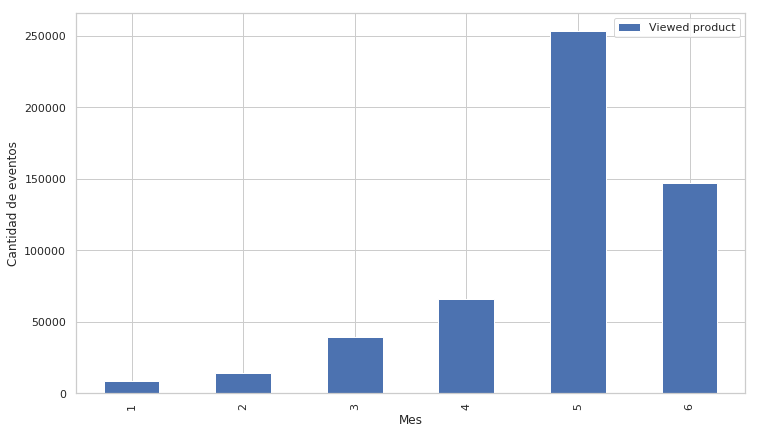

In [68]:
#seba
g = viewed_product.groupby([tf['timestamp_datetime'].dt.month, 'event']).size().unstack()\
                        .plot(kind='bar', figsize=(12,7))

g.set_xlabel("Mes")
g.set_ylabel('Cantidad de eventos')
g.legend(['Viewed product']);

### Visitas a un producto segun mes y dia de la semana

In [42]:
# Vemos las visitas a un producto segun dia de la semana y mes.
visitas_prod_mes_dia_semana = viewed_product.groupby(['timestamp_month','timestamp_weekday']).agg({'event':'count'})\
                .pivot_table(index = 'timestamp_weekday',columns = 'timestamp_month',values = 'event')
visitas_prod_mes_dia_semana

timestamp_month,1,2,3,4,5,6
timestamp_weekday,,,,,,
Friday,1415,2040,5946,10368,29950,28228
Monday,1128,1949,5091,11369,36761,21355
Saturday,979,1658,5167,7826,26202,18481
Sunday,805,1240,3723,6907,23317,15169
Thursday,1155,2098,7201,10080,44073,20789
Tuesday,1722,2539,6566,9665,47285,22633
Wednesday,1647,2606,5972,9729,45724,20373


Text(50.7222,0.5,'Dia de la visita')

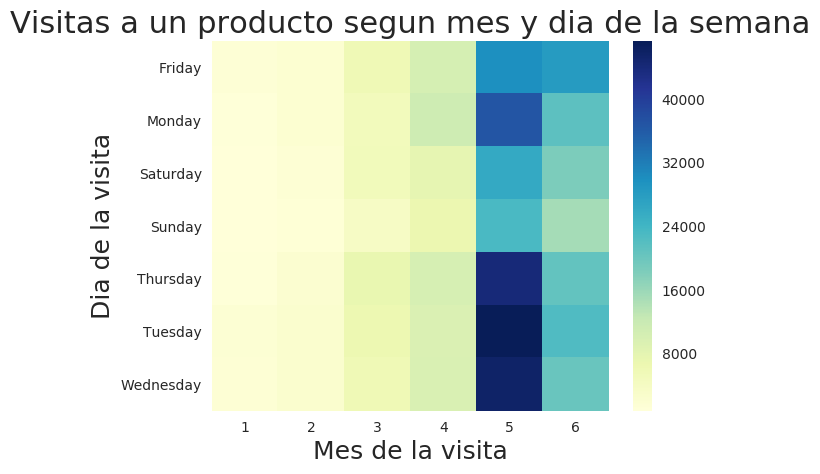

In [43]:
visitas_prod_mes_dia_semana = sns.heatmap(visitas_prod_mes_dia_semana,  cmap="YlGnBu")
visitas_prod_mes_dia_semana.set_title("Visitas a un producto segun mes y dia de la semana", fontsize=22)
visitas_prod_mes_dia_semana.set_xlabel("Mes de la visita",fontsize=18)
visitas_prod_mes_dia_semana.set_ylabel("Dia de la visita", fontsize=18)

### Visitas a un producto segun mes y dia del mes

In [60]:
# Vemos las visitas a un producto segun mes y dia del mes.
visitas_prod_mes_dia = viewed_product.groupby(['timestamp_month','timestamp_day']).agg({'event':'count'})\
                .pivot_table(index = 'timestamp_month',columns = 'timestamp_day',values = 'event')
visitas_prod_mes_dia

timestamp_day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
timestamp_month,,,,,,,,,,,,,,,,,,,,,
1,6.00,122.00,263.00,250.00,510.00,179.00,171.00,210.00,431.00,445.00,...,294.00,317.00,260.00,161.00,298.00,313.00,208.00,252.00,307.00,329.00
2,307.00,407.00,238.00,319.00,464.00,333.00,355.00,277.00,379.00,413.00,...,613.00,814.00,416.00,399.00,737.00,849.00,833.00,nan,nan,nan
3,629.00,739.00,735.00,507.00,755.00,"1,309.00",749.00,956.00,767.00,"1,211.00",...,"2,309.00","1,790.00","1,306.00","1,214.00","1,690.00","2,180.00","1,914.00","2,130.00","1,252.00",866.00
4,805.00,"1,818.00","2,654.00","2,188.00","2,182.00","1,997.00","1,486.00",925.00,"1,892.00","2,481.00",...,"1,154.00","2,081.00","2,446.00","3,084.00","3,731.00","3,655.00","3,164.00","2,545.00","3,812.00",nan
5,"3,702.00","4,231.00","4,623.00","4,362.00","4,031.00","3,496.00","4,802.00","5,589.00","5,662.00","6,556.00",...,"11,380.00","10,077.00","9,375.00","8,976.00","7,555.00","6,516.00","10,359.00","12,552.00","12,587.00","10,767.00"
6,"10,956.00","10,323.00","8,499.00","11,799.00","13,555.00","11,571.00","12,339.00","9,533.00","8,158.00","6,670.00",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Text(50.7222,0.5,'Mes de la visita')

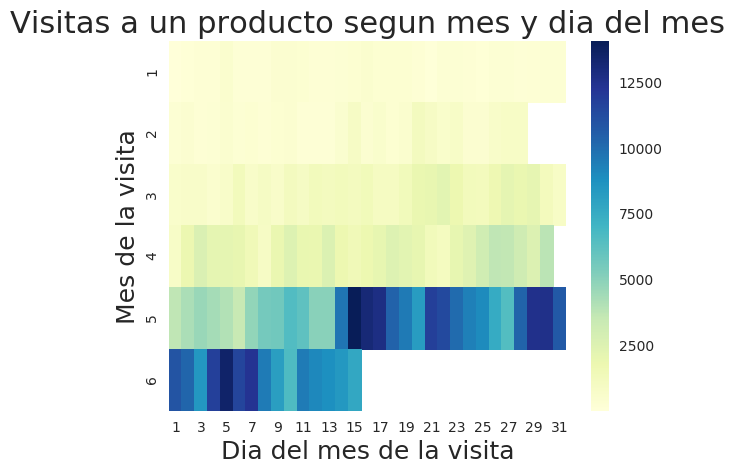

In [61]:
visitas_prod_mes_dia = sns.heatmap(visitas_prod_mes_dia,  cmap="YlGnBu")
visitas_prod_mes_dia.set_title("Visitas a un producto segun mes y dia del mes", fontsize=22)
visitas_prod_mes_dia.set_xlabel("Dia del mes de la visita",fontsize=18)
visitas_prod_mes_dia.set_ylabel("Mes de la visita", fontsize=18)

### Visitas a productos segun dia del año

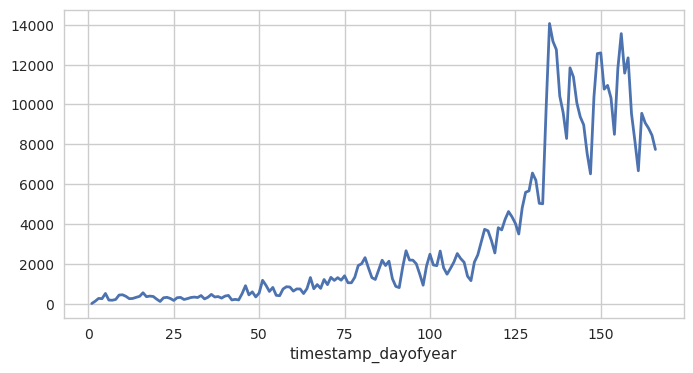

In [62]:
# Visitas a productos segun dia del año
viewed_product.groupby('timestamp_dayofyear').count().loc[:,'event'].plot(linewidth=2,figsize=(8,4))


# Ad campaign hit

“ad campaign hit”: El usuario ingresa al sitio mediante una campana de marketing online.

#### Santi

Me puede interesar analizar url, person , campaign source y el tiempo.

In [47]:
# La columna cuenta con 31 valores nulos. Son muy pocos comparados con los datos que tenemos, asi que trabajo
# con el resto.

ad_campaign_hit = tf.loc[tf['event'] == 'ad campaign hit']
ad_campaign_hit['campaign_source'].isnull().sum()

31

### Campañas publicitarias mas populares

In [49]:
ad_campaign_hit['campaign_source'].value_counts()

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
socialmedia             1
Google Social           1
Name: campaign_source, dtype: int64

Text(0,0.5,'Campañas')

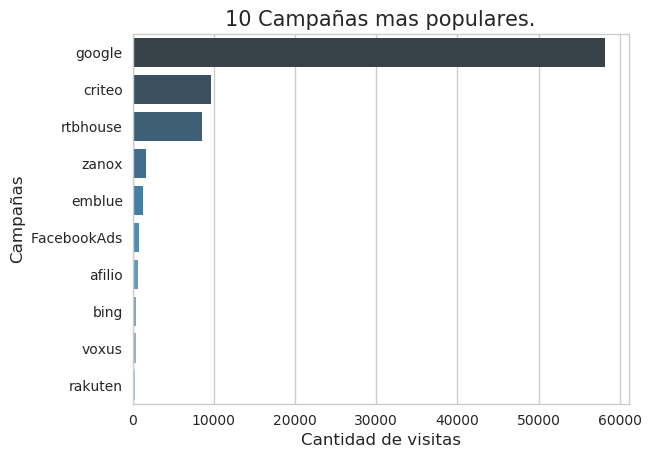

In [66]:
# Grafico de popularidad de campañas publicitarias.

g2 = sns.barplot(x=ad_campaign_hit['campaign_source'].value_counts().head(10).values, y=ad_campaign_hit['campaign_source'].value_counts().head(10).index,palette="Blues_d", orient='h')

g2.set_title("10 Campañas mas populares.", fontsize=15)
g2.set_xlabel("Cantidad de visitas", fontsize=12)
g2.set_ylabel("Campañas", fontsize=12)

### Campañas publicitas mas populares segun el mes

In [50]:
pd.crosstab(ad_campaign_hit.timestamp_month,ad_campaign_hit.campaign_source)

campaign_source,Facebook,FacebookAds,FacebookSocial,Google Social,MARKETING SOCIAL,afiliado,afilio,bing,blog,buscape,...,indexa,manifest,mercadopago,onsite,rakuten,rtbhouse,socialmedia,voxus,yotpo,zanox
timestamp_month,,,,,,,,,,,,,,,,,,,,,
1,0,59,3,0,0,0,101,16,1,33,...,6,1,0,0,0,136,1,0,1,70
2,2,63,0,0,0,0,26,11,0,44,...,1,0,0,3,0,274,0,0,0,62
3,12,208,0,0,0,8,55,52,13,62,...,13,2,0,0,0,717,0,0,0,157
4,6,15,0,0,0,5,94,53,11,0,...,8,31,0,0,32,1598,0,0,1,252
5,38,111,5,0,0,14,264,255,5,2,...,81,55,10,0,113,4122,0,320,19,737
6,19,308,0,1,7,7,152,97,7,0,...,45,37,8,0,165,1703,0,112,4,395


Text(0,0.5,'Cantidad de clicks')

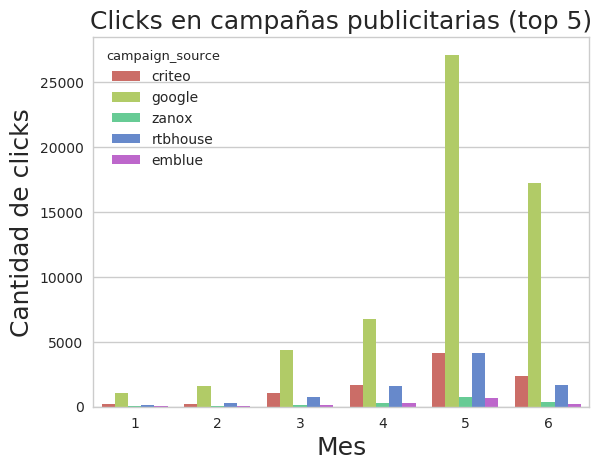

In [60]:
# Un grafico de lo mismo.
camp_ppales = ['google','criteo', 'rtbhouse', 'zanox', 'emblue']
g = sns.countplot(x="timestamp_month", hue="campaign_source"\
                , data=ad_campaign_hit.loc[ad_campaign_hit['campaign_source'].isin(camp_ppales)], palette="hls")
g.set_title("Clicks en campañas publicitarias (top 5)", fontsize=18)
g.set_xlabel("Mes", fontsize=18)
g.set_ylabel("Cantidad de clicks", fontsize=18)

### Clicks por dia de las 5 campañas publicitarias mas populares (con mas clicks)

Text(0,0.5,'Cantidad de clicks')

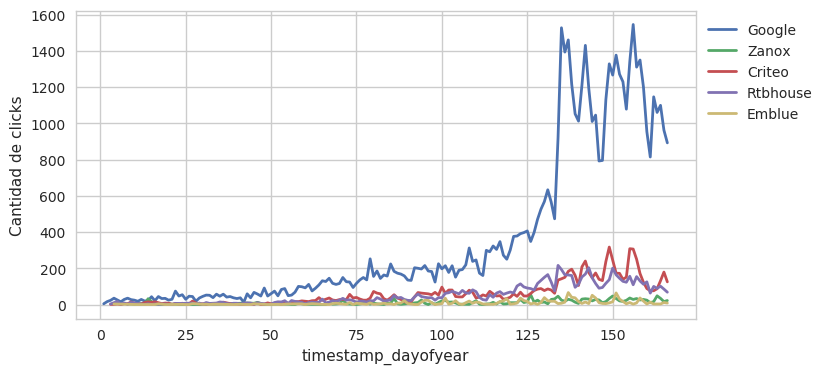

In [61]:
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4),label = 'Google')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'zanox']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Zanox')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'criteo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Criteo')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'rtbhouse']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Rtbhouse')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'emblue']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Emblue')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.ylabel('Cantidad de clicks')


### Relacion entre los clicks en la campañas publicitarias y las visitas y compras de los productos.
   Ademas podemos ver si existe algun tipo de relacion entre los clicks en la campañas publicitarias y las visitas y compras de los productos.

Text(0.5,1,'Relacion de la cantidad de clicks en campañas con visitas y compras de productos')

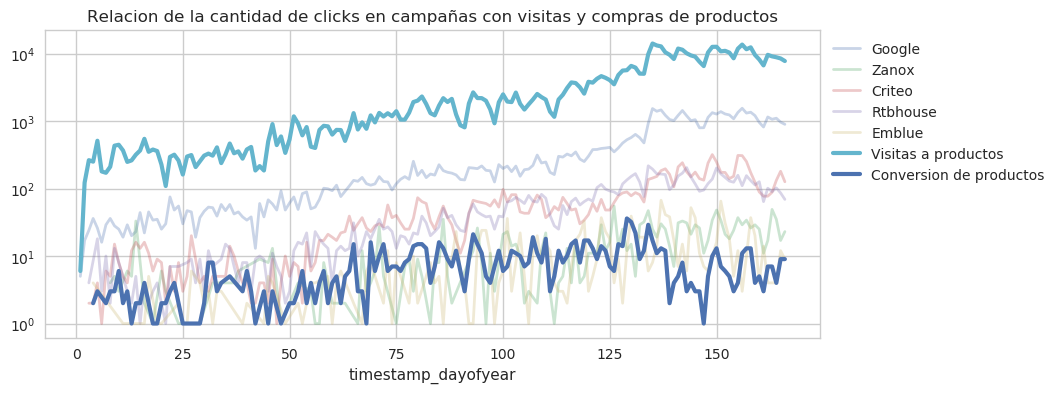

In [70]:
# Ademas podemos ver si existe algun tipo de relacion entre los clicks en la campañas publicitarias
# y las visitas y compras de los productos.

(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(10,4),label = 'Google',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'zanox']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Zanox',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'criteo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Criteo',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'rtbhouse']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Rtbhouse',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'emblue']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Emblue',alpha = 0.3)
viewed_product.groupby('timestamp_dayofyear').count().loc[:,'event'].plot(logy = True, linewidth=3\
                                                                          ,label = 'Visitas a productos')
trocafone.loc[trocafone['event'] == 'conversion'].groupby('timestamp_dayofyear').count().loc[:,'event']\
                                                .plot(linewidth=3,label = 'Conversion de productos')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Relacion de la cantidad de clicks en campañas con visitas y compras de productos')


Podemos ver que a medida que aumentan los clicks en las campañas publicitarias, tambien
lo hacen las visitas a productos, lo cual es logico. Algo quizas no tan esperado es que aunque aumentan
las visitas y los clicks en las publicidades, las conversiones no parecen aumentar. En la primer mitad podemos
ver que era mas baja la cantidad de conversiones, pero luego distingimos que estas se mantienen aroximadamente 
constantes a pesar del incremento en las visitas.


### Url's mas accedidas.

In [71]:
ad_campaign_hit['url'].value_counts(normalize = False).drop(labels = '/')
# Podemos ver que direcciones, y por lo tanto que celulares, son las que mas son clickeadas.

/comprar/iphone                                     4132
/comprar/iphone/6s                                  3393
/comprar/iphone/6                                   3228
/comprar/samsung                                    2782
/comprar/iphone/iphone-5s                           2689
/comprar/samsung/galaxy-j5                          2446
/comprar/samsung/galaxy-s7-edge                     1972
/comprar/samsung/galaxy-s8                          1499
/comprar/samsung/galaxy-j7                          1465
/comprar/samsung/galaxy-s6-edge                     1415
/comprar/motorola                                   1154
/comprar/samsung/galaxy-s7                          1139
/comprar/iphone/7                                   1120
/comprar/samsung/galaxy-s6-flat                     1067
/comprar/iphone/iphone-6s-plus                       947
/comprar/samsung/samsung-gran-prime-duos-tv          944
/comprar/samsung/a5                                  906
/comprar/samsung/              

In [72]:
ad_campaign_hit['person'].value_counts() # Ver si lo puedo relacionar con algo. !

a202cfba    279
c013417a    277
5af7e2bc    220
875eb866    207
5107ab49    167
14752aa3    152
13d3dbee    147
ff9dc4b8    144
3952fd6f    144
7433a87f    133
e2b0ce1b    131
ba102035    127
d9251b63    122
778fcfbd    119
0b2bff0b    116
dfb2ba6c    112
f3c1111e    110
8fb99250    109
4f50d6c5    102
4ba1247a    101
95b58cd6    100
ff637ea2    100
9ab4565c     92
a1e1f8ec     91
f0887975     87
8ade1780     86
5b9f64aa     86
3444791f     86
2b87e81a     85
f3a682fb     84
           ... 
bbac73a9      1
b475a006      1
dfc9d91c      1
fc8fbffe      1
f2087711      1
889c1c21      1
eda5a0cd      1
714dfb6e      1
07981aaa      1
1303980b      1
ddc59d3b      1
2179f84c      1
ce8ffc96      1
989ef219      1
9eb80798      1
80bce38a      1
a114536c      1
d5b70bdc      1
bb3da243      1
372c1396      1
96d70a9d      1
e71df7af      1
e4bb5c8b      1
6e8e13fd      1
85586e0d      1
f8657c35      1
bbb3f4b8      1
eca46878      1
edb0bb8a      1
14c67583      1
Name: person, Length: 21

# Generic listing

El usuario visita la homepage.

In [73]:
# Podria investigar que paso con los skus, person y el tiempo.

# Searched products
El usuario realiza una búsqueda de productos en la interfaz de búsqueda del site.


#### Santi

### Que suelen buscar los usuarios

In [64]:
searched_products = tf.loc[tf['event'] == 'searched products']
searched_products['search_term'].str.lower().value_counts(normalize = True)

# Podemos ver que la mayoria de las busquedas son de celulares iPhone, seguido por los Samsung.

iphone 6                                                   0.07
iphone                                                     0.06
iphone 6s                                                  0.05
iphone 7                                                   0.03
iphone 5s                                                  0.02
j7                                                         0.02
motorola                                                   0.02
j5                                                         0.02
s7                                                         0.02
iphone 6 plus                                              0.02
s8                                                         0.01
iphone se                                                  0.01
samsung                                                    0.01
iphone 6s plus                                             0.01
iphone 5                                                   0.01
iphone 7 plus                           

### Calculo aproximado de cuales son los celulares mas buscados

In [83]:
# calculo aproximado.
iphone = searched_products['search_term'].str.lower().str.contains('iphone|5s|5c|6s|7s').sum()
total = searched_products['search_term'].count()
(iphone / total) * 100 
# Los iphone constituyen aproximadamente el 40 %  de las busquedas.

39.62260297751547

In [81]:
samsung = searched_products['search_term'].str.lower().str.contains('samsung|s3|s4|s5|s6|s7|s8|j7|j5|j3|note|a3|a5|a7').sum()
(samsung / total) * 100
# Los samsung constituyen aproximadamente un 30 % de la busquedas.

30.68597218534932

In [77]:
motorola = searched_products['search_term'].str.lower().str.contains('moto').sum()
(motorola / total) * 100
# Los motorola constituyen aproximadamente un 10 % de la busquedas.

11.816121061122796

# Search engine hit
“search engine hit”: El usuario ingresa al sitio mediante un motor de búsqueda web.


#### Santi

### Motores de busqueda mas populares

In [78]:
search_engine_hit = tf.loc[tf['event'] == 'search engine hit']

# Las visitas se dan por un motor de busqueda. Cuales son los mas populares?
search_engine_hit['search_engine'].value_counts()

Google    50240
Bing        424
Yahoo       287
Ask           6
Name: search_engine, dtype: int64

### Ingresos a traves de un motor de busqueda

Text(0,0.5,'Motores de busqueda')

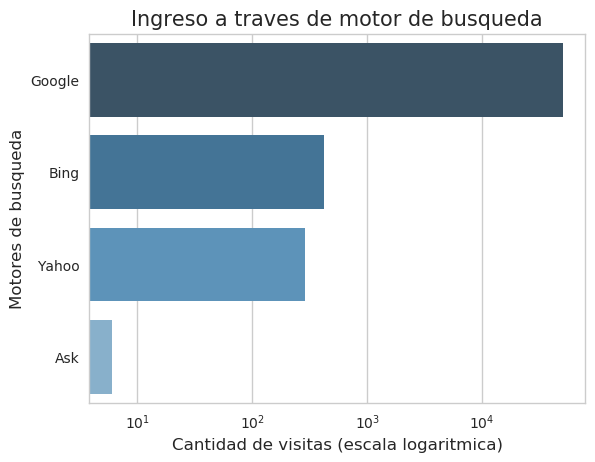

In [79]:
# Ingresos a traves de un motor de busqueda.

g = sns.barplot(x=search_engine_hit['search_engine'].value_counts().values, y=search_engine_hit['search_engine'].value_counts().index,palette="Blues_d", orient='h')
g.set_xscale('log')
g.set_title("Ingreso a traves de motor de busqueda", fontsize=15)
g.set_xlabel("Cantidad de visitas (escala logaritmica)", fontsize=12)
g.set_ylabel("Motores de busqueda", fontsize=12)

### Ingresos a traves de un motor de busqueda en el tiempo

Text(0.5,1,'Ingresos a traves de un motor de busqueda en el tiempo')

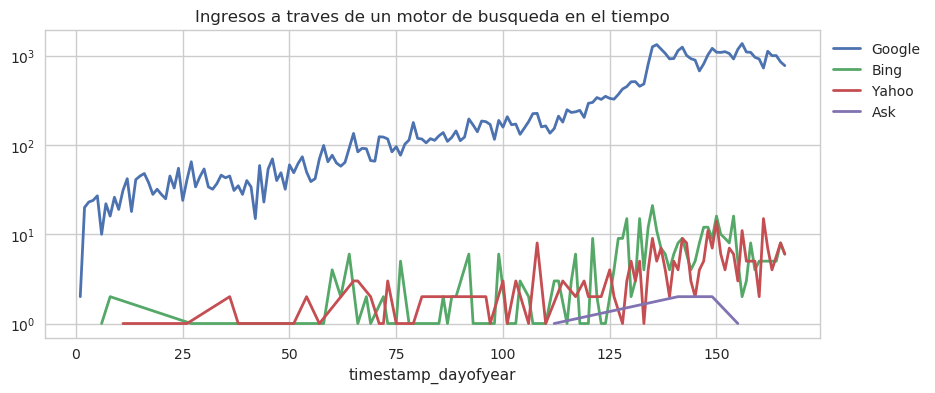

In [80]:
# Ingresos a traves de un motor de busqueda en el tiempo.

(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(10,4),label = 'Google', logy = True)
(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Bing']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Bing')
(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Yahoo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Yahoo')
(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Ask']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Ask')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Ingresos a traves de un motor de busqueda en el tiempo')


# Checked out

# Visited site

#### Santi

En ppio puedo relacionarlo con person, news vs returning, city, region, country, device_type, screen_resolution, operating_system_version, browser_version y el tiempo

In [158]:
visited_site = tf.loc[tf['event'] == 'visited site']

### Analizamos desde donde se hacen las visitas

In [159]:
# Visitas por pais
visited_site['country'].value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
France                   13
Netherlands              13
Mozambique               12
United Kingdom           12
Japan                    11
Poland                    9
French Guiana             8
Romania                   7
Italy                     7
Portugal                  7
Russia                    6
Dominican Republic        6
Guadeloupe                6
Germany                   5
Bangladesh                4
Colombia                  4
Paraguay                  4
Switzerland               3
Morocco                   2
India                     2
Angola                    2
Venezuela                 1
Zimbabwe                  1
Saudi Arabia              1
Israel                    1
Algeria                   1
Mexico                    1
Denmark                   1
Spain                     1
Belize                    1
Turkey              

In [ ]:
# Analizo que pasa con el pais Unknown.

In [160]:
visited_site.loc[visited_site['country'] == 'Unknown']['city']

116        Unknown
118        Unknown
127        Unknown
144        Unknown
154        Unknown
168        Unknown
175        Unknown
190        Unknown
203        Unknown
206        Unknown
210        Unknown
221        Unknown
258        Unknown
261        Unknown
266        Unknown
268        Unknown
833        Unknown
1713       Unknown
2422       Unknown
2427       Unknown
2436       Unknown
3159       Unknown
3195       Unknown
4241       Unknown
4249       Unknown
4251       Unknown
4257       Unknown
4276       Unknown
4279       Unknown
4304       Unknown
            ...   
993408     Unknown
993413     Unknown
993442     Unknown
993448     Unknown
993479     Unknown
993481     Unknown
993488     Unknown
993621     Unknown
994111     Unknown
997254     Unknown
997287     Unknown
997314     Unknown
997412     Unknown
998811     Unknown
999689     Unknown
999701     Unknown
1000922    Unknown
1003528    Unknown
1003987    Unknown
1004335    Unknown
1004903    Unknown
1005379    U

In [161]:
visited_site.loc[visited_site['country'] == 'Unknown']['region']

116        Unknown
118        Unknown
127        Unknown
144        Unknown
154        Unknown
168        Unknown
175        Unknown
190        Unknown
203        Unknown
206        Unknown
210        Unknown
221        Unknown
258        Unknown
261        Unknown
266        Unknown
268        Unknown
833        Unknown
1713       Unknown
2422       Unknown
2427       Unknown
2436       Unknown
3159       Unknown
3195       Unknown
4241       Unknown
4249       Unknown
4251       Unknown
4257       Unknown
4276       Unknown
4279       Unknown
4304       Unknown
            ...   
993408     Unknown
993413     Unknown
993442     Unknown
993448     Unknown
993479     Unknown
993481     Unknown
993488     Unknown
993621     Unknown
994111     Unknown
997254     Unknown
997287     Unknown
997314     Unknown
997412     Unknown
998811     Unknown
999689     Unknown
999701     Unknown
1000922    Unknown
1003528    Unknown
1003987    Unknown
1004335    Unknown
1004903    Unknown
1005379    U

In [162]:
# No hay informacion tampoco de la ciudad ni de la region.
# Lo saco para poder analizar lo demas.
visited_site_geo = visited_site.loc[(visited_site['country'] != 'Unknown') & (visited_site['city'] != 'Unknown') & \
                                   (visited_site['region'] != 'Unknown')]

### Visitas por pais

In [163]:
# Visitas por pais.
visited_site_geo['country'].value_counts()
# Practicamente todas las visitas fueron de Brazil.

Brazil                70935
United States           407
Argentina                86
Canada                   31
Japan                    11
United Kingdom           10
Netherlands               9
Poland                    9
Mozambique                8
Romania                   7
Portugal                  7
Dominican Republic        6
Italy                     4
France                    3
Switzerland               3
Germany                   2
Paraguay                  2
Russia                    2
India                     2
Bangladesh                1
Uruguay                   1
China                     1
Mexico                    1
South Africa              1
Sri Lanka                 1
Morocco                   1
Venezuela                 1
Turkey                    1
Name: country, dtype: int64

### Visitas por ciudad

In [164]:
# Visitas por ciudad.
visited_site_geo['city'].value_counts()

São Paulo                     11711
Rio de Janeiro                 3538
Belo Horizonte                 2568
Salvador                       2314
Brasília                       1530
Osasco                         1148
Curitiba                       1132
Fortaleza                      1084
Recife                          913
Goiânia                         853
Porto Alegre                    799
Guarulhos                       776
São Bernardo do Campo           716
Belém                           640
São Luís                        597
Manaus                          507
Natal                           487
Montes Claros                   482
Campinas                        471
Barueri                         466
Santo André                     434
Duque de Caxias                 429
Petrolina                       424
Teresina                        388
Sorocaba                        376
Campo Grande                    373
Maceió                          370
Contagem                    

### Visitas por region

In [169]:
# Visitas por region.
visited_site_geo['city'].value_counts()

São Paulo                     11711
Rio de Janeiro                 3538
Belo Horizonte                 2568
Salvador                       2314
Brasília                       1530
Osasco                         1148
Curitiba                       1132
Fortaleza                      1084
Recife                          913
Goiânia                         853
Porto Alegre                    799
Guarulhos                       776
São Bernardo do Campo           716
Belém                           640
São Luís                        597
Manaus                          507
Natal                           487
Montes Claros                   482
Campinas                        471
Barueri                         466
Santo André                     434
Duque de Caxias                 429
Petrolina                       424
Teresina                        388
Sorocaba                        376
Campo Grande                    373
Maceió                          370
Contagem                    

### Visitas por estado

In [211]:
# Visitas por estado.

# Saco los acentos y pongo todo en minuscula.

estados_br = visited_site_geo['region'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
estados_br = estados_br.str.lower()
estados_br

1                 pernambuco
5             rio de janeiro
9             rio de janeiro
16            rio de janeiro
45                 sao paulo
87                 sao paulo
235        rio grande do sul
244        rio grande do sul
252        rio grande do sul
272           rio de janeiro
274           rio de janeiro
302                sao paulo
327                    bahia
331                    bahia
339             minas gerais
352             minas gerais
354             minas gerais
362                sao paulo
369                  paraiba
374                  paraiba
389           rio de janeiro
394           espirito santo
398           espirito santo
403           espirito santo
408           espirito santo
420           espirito santo
440           espirito santo
466           espirito santo
481                 maranhao
487                 maranhao
                 ...        
1010865         minas gerais
1010874         minas gerais
1010880       rio de janeiro
1010890       

In [212]:
estados_br.value_counts()

sao paulo                           24737
minas gerais                         7692
rio de janeiro                       6749
bahia                                5693
pernambuco                           2932
ceara                                2776
parana                               2587
rio grande do sul                    2540
federal district                     1684
goias                                1529
santa catarina                       1505
para                                 1296
maranhao                             1289
espirito santo                       1250
rio grande do norte                  1052
paraiba                               868
piaui                                 815
alagoas                               751
mato grosso do sul                    617
tocantins                             592
amazonas                              586
mato grosso                           476
sergipe                               396
rondonia                          

In [213]:
# Me quedo solo con los estados de Brasil.
## GRAFICO PENDIENTE!!!! 
lista_estados_br = ['acre', 'alagoas', 'amapa', 'la amazonas', 'bahia', 'ceara', 'espiritu santo', 'goias', 'maranhao', 'mato grosso', 'mato grosso do sul', 'minas gerais', 'para', 'paraiba', 'parana', 'pernambuco', 'piaui', 'rio de janeiro', 'rio grande do norte', 'rio grande do sul', 'rondonia', 'roraima', 'santa catarina', 'sao paulo', 'sergipe', 'tocantins']
estados_br = estados_br.loc[estados_br.isin(lista_estados_br)]
estados_br.value_counts()


sao paulo              24737
minas gerais            7692
rio de janeiro          6749
bahia                   5693
pernambuco              2932
ceara                   2776
parana                  2587
rio grande do sul       2540
goias                   1529
santa catarina          1505
para                    1296
maranhao                1289
rio grande do norte     1052
paraiba                  868
piaui                    815
alagoas                  751
mato grosso do sul       617
tocantins                592
mato grosso              476
sergipe                  396
rondonia                 216
amapa                    144
acre                      96
roraima                   67
Name: region, dtype: int64

# Conversion

### Modelos mas comprados:

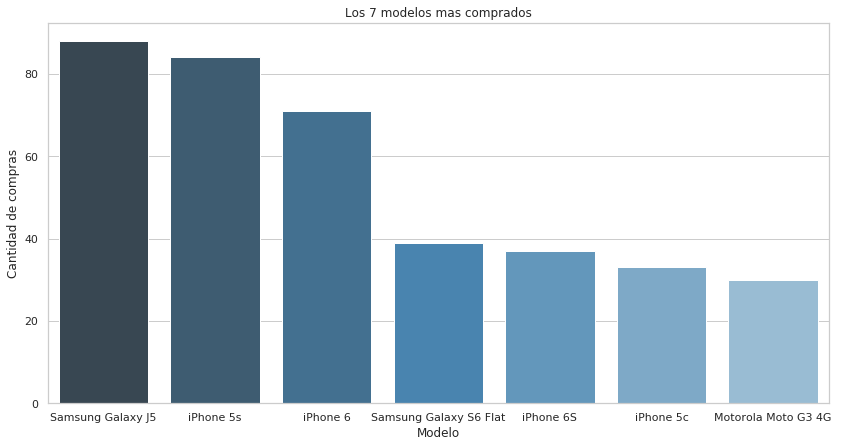

In [84]:
#seba

tf_event_mod = tf.filter(items = ['event', 'model'])


fig, ax = plt.subplots(figsize=(14,7))

mas_comp = tf_event_mod.loc[tf_event_mod['event'] == 'conversion']['model'].value_counts().head(7)

g = sns.barplot(x=mas_comp.index, y=mas_comp.values, palette="Blues_d", orient='v', ax=ax)

g.set(xlabel='Modelo', ylabel='Cantidad de compras', title='Los 7 modelos mas comprados');

### Cantidad de comprados por condicion del producto

In [111]:
#seba

conversions = tf.loc[tf['event'] == 'conversion']

In [112]:
#chequeo si hay eventos de compra sin registro de condicion
conversions['condition'].isna().sum()

0

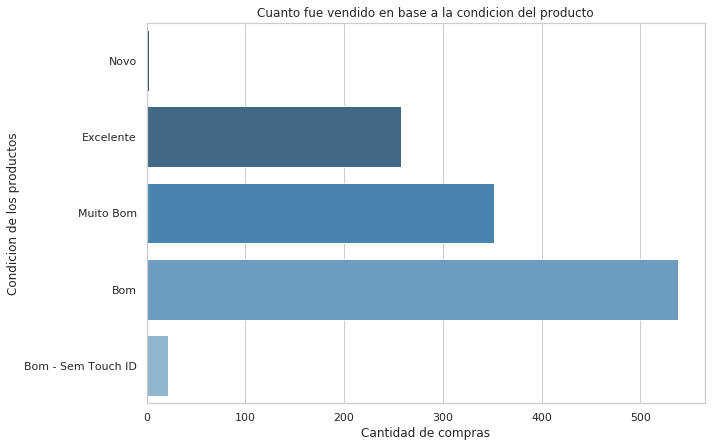

In [113]:
qual = ['Novo', 'Excelente', 'Muito Bom', 'Bom', 'Bom - Sem Touch ID']
condition = conversions['condition'].value_counts().reindex(qual)

fig, ax = plt.subplots(figsize=(10,7))

g = sns.barplot(y=condition.index, x=condition.values, palette="Blues_d", orient='h', ax=ax)

g.set(xlabel='Cantidad de compras', ylabel='Condicion de los productos', title='Cuanto fue vendido en base a la condicion del producto');

Cabe destacar que antes de comparar las ventas en base a las condiciones del produto, se deberia tener en cuenta cuantos productos de cada condicion posee la pagina.

# Staticpage

# Lead

### Modelos no disponibles con más pedidos de notificación de stock 

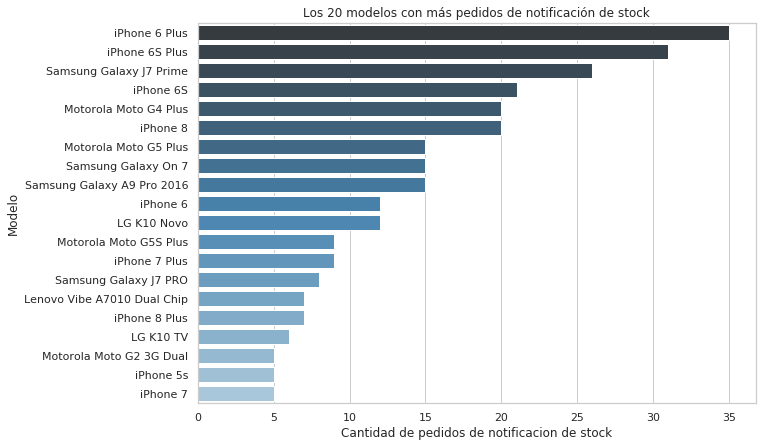

In [101]:
#seba

tf_event_mod = tf.filter(items = ['event', 'model'])


mas_pedidos = tf_event_mod.loc[tf_event_mod['event'] == 'lead']['model'].value_counts().head(20)

fig, ax = plt.subplots(figsize=(10,7))

g = sns.barplot(y=mas_pedidos.index, x=mas_pedidos.values, palette="Blues_d", orient='h', ax=ax)

g.set(xlabel='Cantidad de pedidos de notificacion de stock', ylabel='Modelo',\
      title='Los 20 modelos con más pedidos de notificación de stock');

# Brand listing

# -------------------------------------------------------------------------------------------------------------

In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs


tf = pd.read_csv('/home/santi/fiuba-tf-tp1-final-set/events.csv',dtype=object)

# Breve descripcion del set de datos.

# Columnas
tf.columns

tf.head()

tf.describe()

tf.info()

# Analizo eventos y relacion de estos con otras variables

# Hay eventos nulos en la columna event?
tf['event'].isnull().sum()

# Comprobamos si hay alguna fecha nula. 
tf['timestamp'].isnull().any()

# Agregamos nuevas columnas para trabajar mejor con el tiempo. (año, mes, dia, dia del año)
tf['timestamp_datetime'] = pd.to_datetime(tf['timestamp'])
tf['timestamp_year'] = tf['timestamp_datetime'].dt.year
tf['timestamp_month'] = tf['timestamp_datetime'].dt.month
tf['timestamp_day'] = tf['timestamp_datetime'].dt.day
tf['timestamp_weekday'] = tf['timestamp_datetime'].dt.weekday_name
tf['timestamp_dayofyear'] = tf['timestamp_datetime'].dt.dayofyear

## Eventos en general

# Nombres de los eventos.

tf['event'].value_counts()

# Ocurrencias de eventos (grafico)

g1 = sns.barplot(x=tf['event'].value_counts().values, y=tf['event'].value_counts().index, orient='h')
g1.set_title("Ocurrencias de eventos", fontsize=15)
g1.set_xlabel("Ocurrencias", fontsize=12)
g1.set_ylabel("Eventos", fontsize=12)

# Analizamos la evolucion de las visitas en la pagina. hacer
#tf.loc(tf[''])

#tf.groupby('timestamp_dayofyear').agg({'person':'d'})

# Analizo el evento viewed product y brand listing.

# Modelo de celular mas visitado.
# Me quedo solo con el evento viewed product.
viewed_product = tf.loc[tf['event'] == 'viewed product']

# Veo si hay algun valor nulo en la columna model.
viewed_product['model'].isnull().sum()

## Celulares mas visitados

# Modelo de celular mas visitado.
viewed_product['model'].value_counts()

# 15 celulares mas visitados.
viewed_product['model'].value_counts().head(15)

# Grafico de barras de los 15 celulares mas visitados.

g2 = sns.barplot(x=viewed_product['model'].value_counts().head(15).values, y=viewed_product['model'].value_counts().head(15).index,palette="Blues_d", orient='h')

g2.set_title("15 celulares mas visitados.", fontsize=15)
g2.set_xlabel("Cantidad de visitas", fontsize=12)
g2.set_ylabel("Celulares", fontsize=12)

# Columnas que puedo relacionar con las visitas a los productos (no tienen valores nulos).
viewed_product.dropna(axis = 'columns').columns

# Visitas de cada celular para cada color.
visitas_por_color = viewed_product.groupby(['model','color']).agg({'timestamp':'count'})
visitas_por_color.columns = ['visitas']
visitas_por_color

# Visitas de cada celular para cada capacidad de almacenamiento.
visitas_por_storage = viewed_product.groupby(['model','storage']).agg({'timestamp':'count'})
visitas_por_storage.columns = ['visitas']
visitas_por_storage

# Visitas de cada celular para cada condicion de producto.
visitas_por_condition = viewed_product.groupby(['model','condition']).agg({'timestamp':'count'})
visitas_por_condition.columns = ['visitas']
visitas_por_condition

cel_mas_visitados = ['iPhone 6','iPhone 5s','iPhone 6S','iPhone 7', 'Samsung Galaxy S7 Edge']
cel_mas_visitados_por_storage = viewed_product[['model','storage']].loc[viewed_product['model'].isin(cel_mas_visitados)]
cel_mas_visitados_por_storage = pd.crosstab(cel_mas_visitados_por_storage.model,cel_mas_visitados_por_storage.storage)
cel_mas_visitados_por_storage

r = [0,1,2,3,4]
cmvps = cel_mas_visitados_por_storage

totals = [i+j+k+l+m for i,j,k,l,m in zip(cmvps['128GB'], cmvps['16GB'],\
                                         cmvps['256GB'], cmvps['32GB'], cmvps['64GB'])]
celcon128 = [i / j * 100 for i,j in zip(cmvps['128GB'], totals)]
celcon16 = [i / j * 100 for i,j in zip(cmvps['16GB'], totals)]
celcon256 = [i / j * 100 for i,j in zip(cmvps['256GB'], totals)]
celcon32 = [i / j * 100 for i,j in zip(cmvps['32GB'], totals)]
celcon64 = [i / j * 100 for i,j in zip(cmvps['64GB'], totals)]

barWidth = 0.85
names = ('S7 Edge','iPhone 5s','iPhone 6','iPhone 6S','iPhone 7')

plt.figure(figsize=(5,3))

plt.bar(r, celcon256, color='#A20101', edgecolor='white', width=barWidth, label = '256GB')

plt.bar(r, celcon128, bottom=celcon256, color='#F44E54', edgecolor='white', width=barWidth, label = '128GB')

plt.bar(r, celcon64, bottom=[i+j for i,j in zip(celcon256, celcon128)], color='#FDDB5E', edgecolor='white'\
                                                , width=barWidth, label = '64GB')

plt.bar(r, celcon32, bottom=[i+j+k for i,j,k in zip(celcon256, celcon128,celcon64)], color='#BAF1A1'\
                                                    , edgecolor='white', width=barWidth, label = '32GB')

plt.bar(r, celcon16, bottom=[i+j+k+l for i,j,k,l in zip(celcon256, celcon128,celcon64,celcon32)], color='#76AD3B'\
                                                        , edgecolor='white', width=barWidth, label = '16GB')

plt.xticks(r, names,fontsize=9)
plt.title('5 celulares mas visitados y su almacenamiento')
plt.xlabel('celulares')
plt.ylabel('porcentaje')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
plt.show()

cel_mas_visitados_por_color = viewed_product[['model','color']].loc[viewed_product['model'].isin(['iPhone 5s','iPhone 6','iPhone 6S','iPhone 7','iPhone 7 Plus'])]
cel_mas_visitados_por_color = pd.crosstab(cel_mas_visitados_por_color.model,cel_mas_visitados_por_color.color)
cel_mas_visitados_por_color

r = [0,1,2,3,4]
cmvpc = cel_mas_visitados_por_color

totals = [i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(cmvpc['Cinza espacial']\
                                                 , cmvpc['Dourado'],cmvpc['Ouro Rosa'], cmvpc['Prateado']\
                                                 , cmvpc['Preto Brilhante'],cmvpc['Preto Matte'],cmvpc['Vermelho'])]

celconCinza = [i / j * 100 for i,j in zip(cmvpc['Cinza espacial'], totals)]
celconDourado = [i / j * 100 for i,j in zip(cmvpc['Dourado'], totals)]
celconRosa = [i / j * 100 for i,j in zip(cmvpc['Ouro Rosa'], totals)]
celconPrateado = [i / j * 100 for i,j in zip(cmvpc['Prateado'], totals)]
celconBrilhante = [i / j * 100 for i,j in zip(cmvpc['Preto Brilhante'], totals)]
celconMatte = [i / j * 100 for i,j in zip(cmvpc['Preto Matte'], totals)]
celconVermelho = [i / j * 100 for i,j in zip(cmvpc['Vermelho'], totals)]

barWidth = 0.5
names = ('iPhone 5s','iPhone 6','iPhone 6S','iPhone 7','iPhone 7 Plus')

plt.figure(figsize=(5,3))

plt.bar(r, celconCinza, color='gray', edgecolor='white', width=barWidth, label = 'Gris')

plt.bar(r, celconDourado, bottom=celconCinza, color='gold', edgecolor='white', width=barWidth, label = 'Dorado')

plt.bar(r, celconRosa, bottom=[i+j for i,j in zip(celconCinza, celconDourado)], color='pink', edgecolor='white', width=barWidth, label = 'Rosa')

plt.bar(r, celconPrateado, bottom=[i+j+k for i,j,k in zip(celconCinza, celconDourado,celconRosa)], color='silver', edgecolor='white', width=barWidth, label = 'Plateado')

plt.bar(r, celconBrilhante, bottom=[i+j+k+l for i,j,k,l in zip(celconCinza, celconDourado,celconRosa,celconPrateado)], color='black', edgecolor='white', width=barWidth, label = 'Negro brillante')

plt.bar(r, celconMatte, bottom=[i+j+k+l+m for i,j,k,l,m in zip(celconCinza, celconDourado,celconRosa,celconPrateado,celconBrilhante)], color='#181609', edgecolor='white', width=barWidth, label = 'Negro matte')

plt.bar(r, celconVermelho, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(celconCinza, celconDourado,celconRosa,celconPrateado,celconBrilhante,celconMatte)], color='#b61609', edgecolor='white', width=barWidth, label = 'Rojo')




plt.xticks(r, names,fontsize=9)
plt.title('5 iPhones mas visitados y su color')
plt.xlabel('celulares')
plt.ylabel('porcentaje')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
plt.show()


## Visitas a un producto en el tiempo

# Vemos las visitas a un producto segun dia de la semana y mes.
visitas_prod_mes_dia_semana = viewed_product.groupby(['timestamp_month','timestamp_weekday']).agg({'event':'count'})\
                .pivot_table(index = 'timestamp_weekday',columns = 'timestamp_month',values = 'event')
visitas_prod_mes_dia_semana

visitas_prod_mes_dia_semana = sns.heatmap(visitas_prod_mes_dia_semana,  cmap="YlGnBu")
visitas_prod_mes_dia_semana.set_title("Visitas a un producto segun mes y dia de la semana", fontsize=22)
visitas_prod_mes_dia_semana.set_xlabel("Mes de la visita",fontsize=18)
visitas_prod_mes_dia_semana.set_ylabel("Dia de la visita", fontsize=18)

# Vemos las visitas a un producto segun mes y dia del mes.
visitas_prod_mes_dia = viewed_product.groupby(['timestamp_month','timestamp_day']).agg({'event':'count'})\
                .pivot_table(index = 'timestamp_month',columns = 'timestamp_day',values = 'event')
visitas_prod_mes_dia

visitas_prod_mes_dia = sns.heatmap(visitas_prod_mes_dia,  cmap="YlGnBu")
visitas_prod_mes_dia.set_title("Visitas a un producto segun mes y dia del mes", fontsize=22)
visitas_prod_mes_dia.set_xlabel("Dia del mes de la visita",fontsize=18)
visitas_prod_mes_dia.set_ylabel("Mes de la visita", fontsize=18)

# Visitas a productos segun dia del año
viewed_product.groupby('timestamp_dayofyear').count().loc[:,'event'].plot(linewidth=2,figsize=(8,4))


# Veo con que puedo relacionar cada evento.
hay otras columnas que pueden tener algunos elementos null pero pueden servir igual (son pocos).

rel_event = tf.groupby('event').agg(lambda x: x.isnull().sum()).T
rel_event

## ad campaign hit

“ad campaign hit”: El usuario ingresa al sitio mediante una campana de marketing online.

Me puede interesar analizar url, person , campaign source y el tiempo.

ad_campaign_hit = tf.loc[tf['event'] == 'ad campaign hit']
ad_campaign_hit['campaign_source'].isnull().sum()

# La columna cuenta con 31 valores nulos. Son muy pocos comparados con los datos que tenemos, asi que trabajo
# con el resto.

# Campañas publicitarias mas populares.
ad_campaign_hit['campaign_source'].value_counts()

# Grafico de popularidad de campañas publicitarias.

g2 = sns.barplot(x=ad_campaign_hit['campaign_source'].value_counts().head(10).values, y=ad_campaign_hit['campaign_source'].value_counts().head(10).index,palette="Blues_d", orient='h')

g2.set_title("10 Campañas mas populares.", fontsize=15)
g2.set_xlabel("Cantidad de visitas", fontsize=12)
g2.set_ylabel("Campañas", fontsize=12)

# Campañas publicitarias mas populares segun el mes.
pd.crosstab(ad_campaign_hit.timestamp_month,ad_campaign_hit.campaign_source)

# Un grafico de lo mismo.
camp_ppales = ['google','criteo', 'rtbhouse', 'zanox', 'emblue']
g = sns.countplot(x="timestamp_month", hue="campaign_source"\
                , tf=ad_campaign_hit.loc[ad_campaign_hit['campaign_source'].isin(camp_ppales)], palette="hls")
g.set_title("Clicks en campañas publicitarias (top 5)", fontsize=18)
g.set_xlabel("Mes", fontsize=18)
g.set_ylabel("Cantidad de clicks", fontsize=18)

# Clicks por dia de las 5 campañas publicitarias mas populares (con mas clicks).
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4),label = 'Google')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'zanox']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Zanox')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'criteo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Criteo')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'rtbhouse']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Rtbhouse')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'emblue']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Emblue')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.ylabel('Cantidad de clicks')


# Ademas podemos ver si existe algun tipo de relacion entre los clicks en la campañas publicitarias
# y las visitas y compras de los productos.

(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(10,4),label = 'Google',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'zanox']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Zanox',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'criteo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Criteo',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'rtbhouse']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Rtbhouse',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'emblue']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Emblue',alpha = 0.3)
viewed_product.groupby('timestamp_dayofyear').count().loc[:,'event'].plot(logy = True, linewidth=3\
                                                                          ,label = 'Visitas a productos')
tf.loc[tf['event'] == 'conversion'].groupby('timestamp_dayofyear').count().loc[:,'event']\
                                                .plot(linewidth=3,label = 'Conversion de productos')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Relacion de la cantidad de clicks en campañas con visitas y compras de productos')


Podemos ver que a medida que aumentan los clicks en las campañas publicitarias, tambien
lo hacen las visitas a productos, lo cual es logico. Algo quizas no tan esperado es que aunque aumentan
las visitas y los clicks en las publicidades, las conversiones no parecen aumentar. En la primer mitad podemos
ver que era mas baja la cantidad de conversiones, pero luego distingimos que estas se mantienen aroximadamente 
constantes a pesar del incremento en las visitas.


ad_campaign_hit['url'].value_counts(normalize = False).drop(labels = '/')
# Podemos ver que direcciones, y por lo tanto que celulares, son las que mas son clickeadas.

ad_campaign_hit['person'].value_counts() # Ver si lo puedo relacionar con algo.

## generic listing

El usuario visita la homepage.

# Podria investigar que paso con los skus, person y el tiempo.

## searched products
El usuario realiza una búsqueda de productos en la interfaz de búsqueda del site.


# Que suelen buscar los usuarios.
searched_products = tf.loc[tf['event'] == 'searched products']
searched_products['search_term'].str.lower().value_counts(normalize = True)

# Podemos ver que la mayoria de las busquedas son de celulares iPhone, seguido por los samsung.

# calculo aproximado.
iphone = searched_products['search_term'].str.lower().str.contains('iphone|5s|5c|6s|7s').sum()
total = searched_products['search_term'].count()
(iphone / total) * 100 
# Los iphone constituyen aproximadamente el 40 %  de las busquedas.

samsung = searched_products['search_term'].str.lower().str.contains('samsung|s3|s4|s5|s6|s7|s8|j7|j5|j3|note|a3|a5|a7').sum()
(samsung / total) * 100
# Los samsung constituyen aproximadamente un 30 % de la busquedas.

motorola = searched_products['search_term'].str.lower().str.contains('moto').sum()
(motorola / total) * 100
# Los motorola constituyen aproximadamente un 10 % de la busquedas.

## search engine hit
“search engine hit”: El usuario ingresa al sitio mediante un motor de búsqueda web.


search_engine_hit = tf.loc[tf['event'] == 'search engine hit']

# Las visitas se dan por un motor de busqueda. Cuales son los mas populares?
search_engine_hit['search_engine'].value_counts()

# Ingresos a traves de un motor de busqueda.

g = sns.barplot(x=search_engine_hit['search_engine'].value_counts().values, y=search_engine_hit['search_engine'].value_counts().index,palette="Blues_d", orient='h')
g.set_xscale('log')
g.set_title("Ingreso a traves de motor de busqueda", fontsize=15)
g.set_xlabel("Cantidad de visitas (escala logaritmica)", fontsize=12)
g.set_ylabel("Motores de busqueda", fontsize=12)

# Ingresos a traves de un motor de busqueda en el tiempo.

(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(10,4),label = 'Google', logy = True)
(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Bing']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Bing')
(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Yahoo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Yahoo')
(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Ask']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Ask')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Ingresos a traves de un motor de busqueda en el tiempo')


## checked out



## visited site
En ppio puedo relacionarlo con person, news vs returning, city, region, country, device_type, screen_resolution, operating_system_version, browser_version y el tiempo

visited_site = tf.loc[tf['event'] == 'visited site']

# Analizo desde donde se hacen las visitas.

# Visitas por pais
visited_site['country'].value_counts()

# Analizo que pasa con el pais Unknown.

visited_site.loc[visited_site['country'] == 'Unknown']['city']

visited_site.loc[visited_site['country'] == 'Unknown']['region']

# No hay informacion tampoco de la ciudad ni de la region.
# Lo saco para poder analizar lo demas.
visited_site_geo = visited_site.loc[(visited_site['country'] != 'Unknown') & (visited_site['city'] != 'Unknown') & \
                                   (visited_site['region'] != 'Unknown')]

# Visitas por pais.
visited_site_geo['country'].value_counts()
# Practicamente todas las visitas fueron de Brazil.

# Visitas por ciudad.
visited_site_geo['city'].value_counts()

# Visitas por region.
visited_site_geo['city'].value_counts()

# Visitas por estado.

# Saco los acentos y pongo todo en minuscula.

estados_br = visited_site_geo['region'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
estados_br = estados_br.str.lower()
estados_br

estados_br.value_counts()

# Me quedo solo con los estados de Brasil.
## GRAFICO PENDIENTE!!!! 
lista_estados_br = ['acre', 'alagoas', 'amapa', 'la amazonas', 'bahia', 'ceara', 'espiritu santo', 'goias', 'maranhao', 'mato grosso', 'mato grosso do sul', 'minas gerais', 'para', 'paraiba', 'parana', 'pernambuco', 'piaui', 'rio de janeiro', 'rio grande do norte', 'rio grande do sul', 'rondonia', 'roraima', 'santa catarina', 'sao paulo', 'sergipe', 'tocantins']
estados_br = estados_br.loc[estados_br.isin(lista_estados_br)]
estados_br.value_counts()


---

#  Person 

Colummna 'person': identificacion de cliente

### Cantidad de visitas por compra de cliente

Solo se analiza a los clientes que tienen por lo menos una compra.

In [178]:
#seba

person_event = tf.filter(items=['person', 'event'])
person_event['cant'] = 1
person_event = person_event.loc[(person_event['event'] == 'conversion') | (person_event['event'] == 'viewed product')]

person_conv = person_event.groupby(['person', 'event']).agg({'cant': 'sum'}).unstack()
person_conv = person_conv.loc[(person_conv['cant']['conversion'].notnull()) & (person_conv['cant']['conversion'] != 0)]

In [103]:
# Cambio nombre columnas
person_conv.columns = ['conversion', 'viewed product']
person_conv.head()

,conversion,viewed product
person,,
00204059,1.00,44.00
00c13dee,1.00,17.00
00fdbb4b,1.00,3.00
0146a9df,1.00,23.00
01db2fe6,1.00,67.00


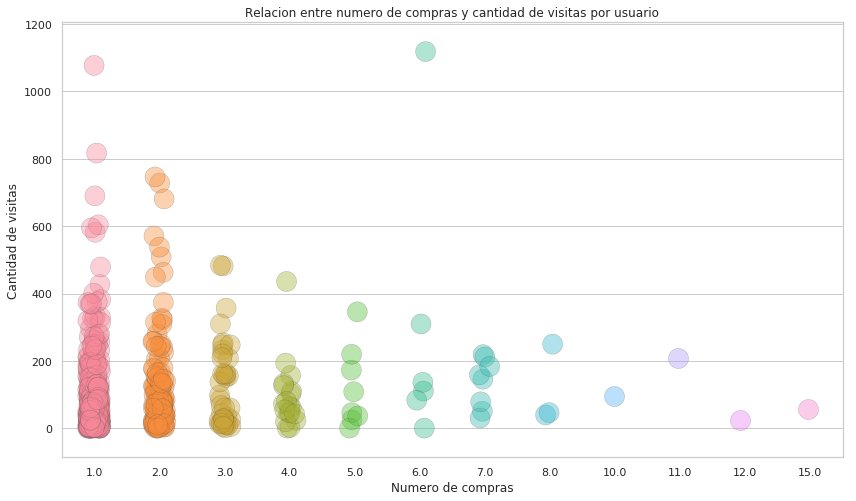

In [106]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)

dx = sns.stripplot(x="conversion", y="viewed product", data=person_conv,\
                   jitter=True, linewidth=0.4, alpha=.4, marker=".", size=40, ax=ax)

dx.set(xlabel='Numero de compras', ylabel='Cantidad de visitas', \
       title='Relacion entre numero de compras y cantidad de visitas por usuario');


Cada punto es un cliente (identificado a partir de la columna 'person') que posee una cantidad total de visitas al sitio (cantidad de eventos 'viewed product') y un numero total de compras (cantidad de eventos 'conversion').

### ¿Cuantos usuarios regresan 'x' cantidad de veces al sitio?

In [177]:
#seba

# No hay registros de personas NaN seguiraca
tf['person'].isna().sum()

0

In [108]:
# Cantidad de usuarios distintos registrados
tf['person'].value_counts().count()

27624

In [114]:
new_vs_returning = tf.filter(items=['person', 'new_vs_returning'])


# Podemos considerar que todos los valores nulos son registros de usuarios que regresan al sitio ('Returning').
# Luego descartaremos los usuarios que no tienen ningun registro de haber ingresado al sitio por primera vez ('New').

new_vs_returning.fillna({'new_vs_returning': 'Returning'}, inplace=True)

new_vs_returning = new_vs_returning.groupby(['person'])['new_vs_returning'].value_counts(dropna=False)

In [115]:
# Obtengo una serie
new_vs_returning.head()

person    new_vs_returning
0004b0a2  Returning            3
          New                  1
0006a21a  Returning            3
          New                  1
000a54b2  Returning           36
Name: new_vs_returning, dtype: int64

In [116]:
# Construyo un DataFrame
new_vs_returning_df = new_vs_returning.unstack()
new_vs_returning_df.head()

new_vs_returning,New,Returning
person,,
0004b0a2,1.00,3.00
0006a21a,1.00,3.00
000a54b2,1.00,36.00
00184bf9,1.00,50.00
0019c395,1.00,7.00


In [117]:
# Veo cuantos nulos hay en la columna 'New'. Es decir, cuantos usuarios no fueron detectados por primera vez
new_vs_returning_df['New'].value_counts(dropna=False)

1.00    26898
 nan      726
Name: New, dtype: int64

In [118]:
# Veo cuantos nulos hay en la columna returning
new_vs_returning_df['Returning'].isna().sum()

0

In [119]:
# Elimino los usuarios que no fueron detectados por primera vez:
new_vs_returning_df.dropna(inplace=True)

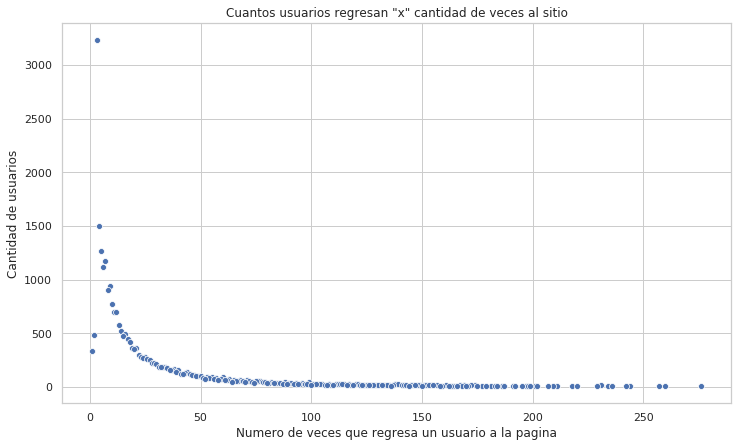

In [157]:
#Si tomamos Todos los valores registrados:

fig, ax = plt.subplots(figsize=(12,7))

relacion = new_vs_returning_df['Returning'].value_counts(sort=True).head(200)

g = sns.scatterplot(x=relacion.index, y=relacion.values, palette="Blues_d", ax=ax)

g.set(xlabel='Numero de veces que regresa un usuario a la pagina', ylabel='Cantidad de usuarios',\
    title='Cuantos usuarios regresan "x" cantidad de veces al sitio');

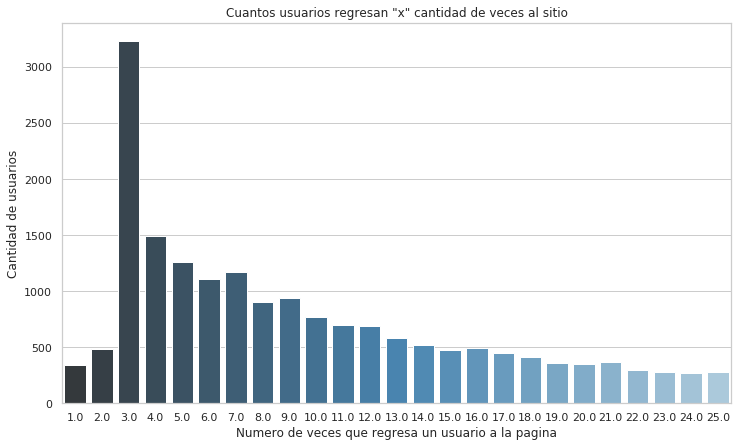

In [180]:
#mejor hacer histograma???????????
# Restringiendo los valorespara una mejor visualizacion y mas especifica:

fig, ax = plt.subplots(figsize=(12,7))

nums = range(1, 24)

relacion = new_vs_returning_df['Returning'].value_counts(sort=True).head(25)

g = sns.barplot(x=relacion.index, y=relacion.values, palette="Blues_d", orient='v', ax=ax)

g.set(xlabel='Numero de veces que regresa un usuario a la pagina', ylabel='Cantidad de usuarios',\
    title='Cuantos usuarios regresan "x" cantidad de veces al sitio');

---

# Notebooks de cada uno:

## SEBA

In [6]:
comprados = tf.loc[tf['event'] == 'conversion']

# Agrego col con nombre del dia
comprados['weekday name'] = tf['timestamp'].dt.weekday_name

/home/seba/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Cantidad de compras por dia de la semana

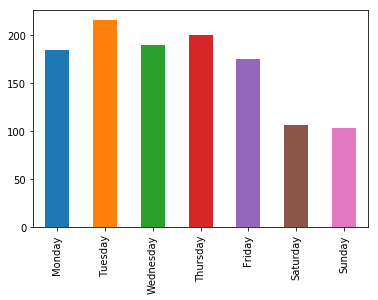

In [7]:
#listo
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

comprados['weekday name'].value_counts().reindex(days).plot(kind='bar')

## Cantidad total de eventos por horario

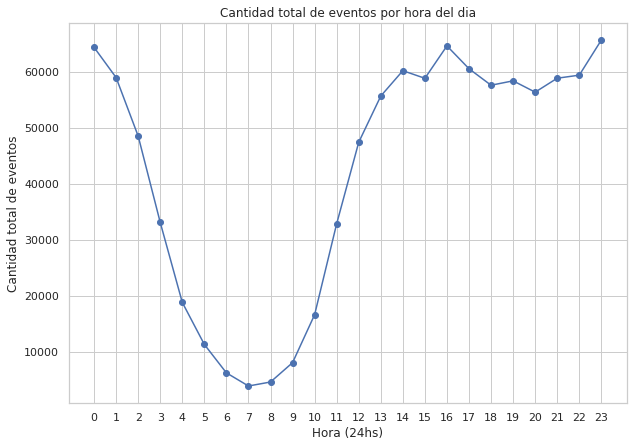

In [14]:
#listo

tf_hr = tf.filter(items = ['country','timestamp_datetime', 'event'])

tf_hr['hour'] = tf_hr['timestamp_datetime'].dt.hour

gr = tf_hr['hour'].value_counts(sort=False).plot(kind='line', figsize=(10, 7), grid=True, style="-o")
gr.set(xlabel='Hora (24hs)', ylabel='Cantidad total de eventos', title='Cantidad total de eventos por hora del dia')
plt.xticks(range(0, 24));

# Analisis de Eventos:

## Cantidad de cada tipo de evento:

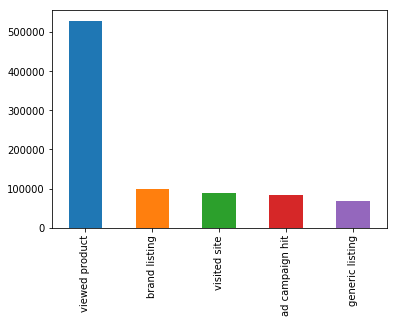

In [107]:
# 5 predominantes:
eventos = tf['event'].value_counts()
eventos.head().plot(kind='bar')

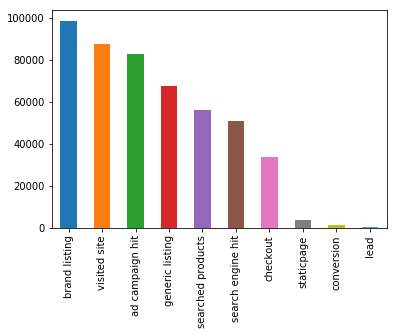

In [111]:
# Sacando evento 'viewed products':

tf['event'].loc[tf['event'] != 'viewed product'].value_counts().plot(kind='bar')

## Cantidad de eventos totales por pais

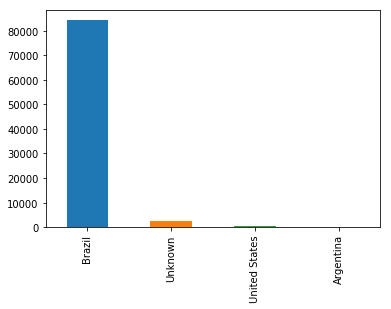

In [268]:
# los 4 predominantes:
# el grafico es feo

tf_short = tf.filter(items = ['event', 'country'])
tf_short['country'].value_counts().head(4).plot(kind='bar')

## Cantidad de eventos 'viewed product' por mes

Text(0.5,0,'Month')

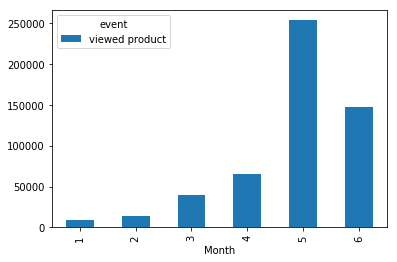

In [269]:
#listo

tf_event_vp = tf.loc[tf['event'] == 'viewed product' ]
g = tf_event_vp.groupby([tf['timestamp'].dt.month, 'event']).size().unstack()\
                        .plot(kind='bar')
g.set_xlabel("Month")

## cant ckeckouts >>> cant conversions:

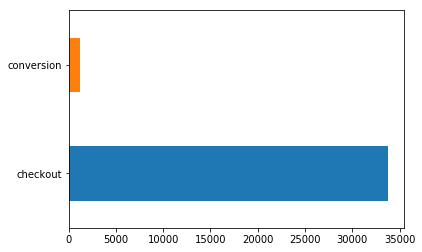

In [270]:
#mal grafico?
tf_event = tf.filter(items = ['event', 'timestamp'])
checkout_vs_conv = tf_event.loc[(tf['event'] == 'checkout') | (tf['event'] == 'conversion')]
checkout_vs_conv['event'].value_counts().plot(kind='barh')

## Modelos mas comprados:

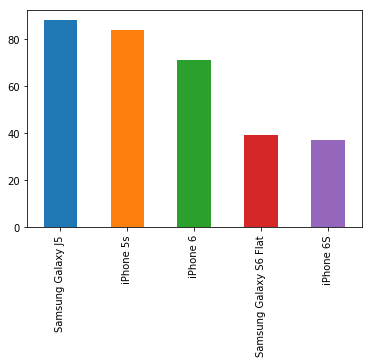

In [260]:
tf_event_mod = tf.filter(items = ['event', 'model'])
tf_event_mod.loc[tf_event_sku['event'] == 'conversion']['model'].value_counts().head().plot(kind='bar')

## Cantidad de comprados por condicion del producto

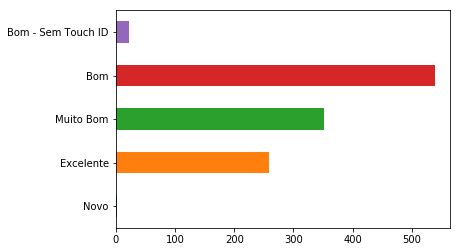

In [261]:
comprados = tf.loc[tf['event'] == 'conversion']

qual = ['Novo', 'Excelente', 'Muito Bom', 'Bom', 'Bom - Sem Touch ID']
comprados['condition'].value_counts().reindex(qual).plot(kind='barh')

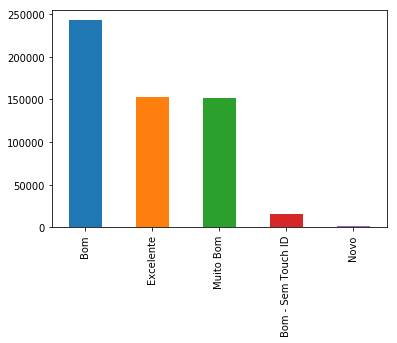

In [233]:
# Cantidad de productos (por 'condition') que tenemos en el tfset:

tf['condition'].value_counts().plot(kind='bar')

## Modelos no disponibles con más pedidos de notificación de stock 

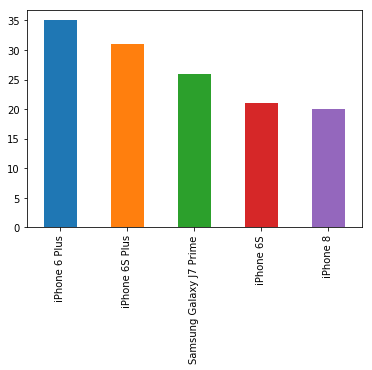

In [262]:
#aca2
tf_event_mod = tf.filter(items = ['event', 'model'])
tf_event_mod.loc[tf_event_mod['event'] == 'lead']['model'].value_counts().head().plot(kind='bar')

# 'new vs returning' por mes

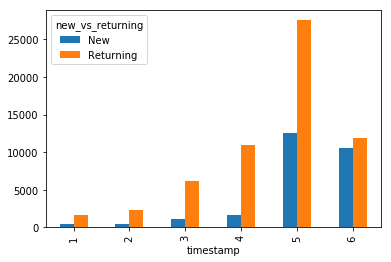

In [263]:
tf_new_vs_ret = tf.filter(items = ['event', 'new_vs_returning'])
tf.groupby([tf['timestamp'].dt.month, 'new_vs_returning']).size().unstack().plot(kind='bar')

## MAGUI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series

tf = pd.read_csv('../../tf/events.csv', low_memory=False)

In [2]:
tf['timestamp'] = pd.to_datetime(tf['timestamp']) #hago date time el tiempo

**Agrego columnas del mes, el día y la hora.** 

In [3]:
# NO HAGO UNA COLUMNA AÑO, PORQUE EL ÚNICO QUE HAY ES 2018
tf['mes'] = tf['timestamp'].map(lambda x: x.month)#LOS MESES VAN DEL 1 AL 6
tf['nombreDelDia'] = tf['timestamp'].map(lambda x: x.weekday_name)
tf['hora'] = tf['timestamp'].dt.hour

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  This is separate from the ipykernel package so we can avoid doing imports until


#Analisis Exploratorio de los datos
## Eventos


In [4]:
# ¿Cuántos eventos hay?
cantidadDeObservaciones = len(tf)

In [5]:
# ¿Cuantos hay de cada evento?
eventos = tf.event
eventos.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [6]:
# ¿hay eventos nulos? 
eventos.isnull().sum() # -> ESTO ES BUENO porque no tengo eventos invalidos

0

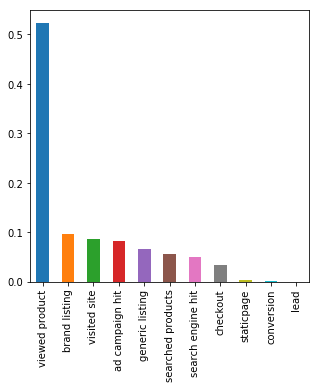

In [7]:
#Gráfico de los eventos
eventosAGraf = eventos.value_counts(normalize = True)
#print(eventosAGraf)
eventosAGraf.plot(kind='bar',figsize=(5,5))

**Conclusión:**

    -El 52% de observaciones son viewed productos (más frecuente)
    
    -El 0,004% de observaciones son lead (menos frecuente)

### ¿Qué campos obligatorios tiene cada evento?

In [8]:
viewedProduct = tf[tf['event'] == 'viewed product']
viewedProductIsNull = viewedProduct.isnull().sum()
brandListing    = tf[tf['event'] == 'brand listing']
brandListingIsNull  = brandListing.isnull().sum()
visitedSite =  tf[tf['event'] == 'visited site']
visitedSiteIsNull = visitedSite.isnull().sum()
adCampaignHit = tf[tf['event'] == 'ad campaign hit']
adCampaignHitIsNull = adCampaignHit.isnull().sum()
genericListing = tf[tf['event'] == 'generic listing']
genericListingIsNull = genericListing.isnull().sum()
searchedProducts = tf[tf['event'] == 'searched products']
searchedProductsIsNull = searchedProducts.isnull().sum()
searchEngineHit = tf[tf['event'] == 'search engine hit']
searchEngineHitIsNull = searchEngineHit.isnull().sum()
checkout = tf[tf['event'] == 'checkout']
checkoutIsNull = checkout.isnull().sum()
staticpage = tf[tf['event'] == 'staticpage']
staticpageIsNull = staticpage.isnull().sum()
conversion = tf[tf['event'] == 'conversion']
conversionIsNull = conversion.isnull().sum()
lead = tf[tf['event'] == 'lead']
leadIsNull = lead.isnull().sum()
pd.tfFrame(dict(viewedProduct = viewedProductIsNull , brandListing = brandListingIsNull, visitedSite = visitedSiteIsNull , adCampaignHit = adCampaignHitIsNull, genericListing = genericListingIsNull, searchedProducts = searchedProductsIsNull, searchEngineHit = searchEngineHitIsNull, checkout = checkoutIsNull, staticpage = staticpageIsNull, conversion = conversionIsNull, lead = leadIsNull)).reset_index()

,index,viewedProduct,brandListing,visitedSite,adCampaignHit,genericListing,searchedProducts,searchEngineHit,checkout,staticpage,conversion,lead
0,timestamp,0,0,0,0,0,0,0,0,0,0,0
1,event,0,0,0,0,0,0,0,0,0,0,0
2,person,0,0,0,0,0,0,0,0,0,0,0
3,url,528931,98635,87378,71,67534,56073,50957,33735,3598,1172,448
4,sku,0,98635,87378,82827,67534,56073,50957,0,3598,0,448
5,model,0,98635,87378,82827,67534,56073,50957,2,3598,0,0
6,condition,0,98635,87378,82827,67534,56073,50957,2,3598,0,448
7,storage,0,98635,87378,82827,67534,56073,50957,2,3598,0,448
8,color,0,98635,87378,82827,67534,56073,50957,2,3598,0,448
9,skus,528931,311,87378,82827,113,119,50957,33735,3598,1172,448


**Los campos obligatorios son: **


(los eventos hora mes y nombre de dia son comunes a todos porque timestamp es comun a todos y todos los timestamp tiene información en el formato correcto)


Para el evento **viewed product**: timestamp | person | sku | model | condition | storage | color.

Para el evento **brand listing**: timestamp | person | skus -> **analizar los 311 skus null**

Para el evento **visited site**: channel | new_vs_returning | city | region | country | device_tipe | screen resolution | operating system version | browser version

Para el evento **ad campaing hit**: timestap | person | url | campaing_sourse -> **analizar que sucede con los 71 null que aparecen url , y los 31 que aparecen en campaing_source y eliminarlos si no sirve**

Para el evento **generic listing**: timestamp | person | skus ->**analizar que sucede con los 113 null que aparecen en skus**

Para el evento **serched product**: timestamp | person | skus | search_term -> **analizar que sucede con los 119 null que aparecen skus y 7106 null que aparecen en search_term**

Para el evento **serched engine**: timestamp | person | search engine

Para el evento **checked out**: timestamp | person | sku | color | storage | model | condition -> **analizar que sucede con los 2 null que aparecen en: color, storage, model, condition**

Para el evento **static page**: timestamp | person | satatic page

Para le evento **conversion**: timestamp | person | sku | model | color | condition | storage

Para el evento **lead**: timestamp | person | model

Esto lo deducimos porque si la cantidad de apariciones de cada evento es igual a la cantidad de nulls que tiene en una columna -> esa columna no representa nada para el evento. 

### Viewed Product

**¿Cuál son las condiciones en las que se encuentraron los modelos que los usuarios visitan?**

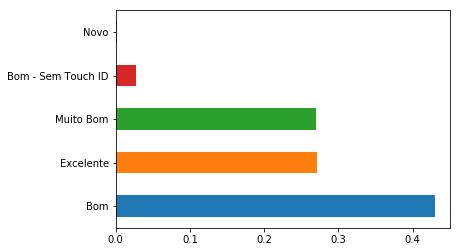

In [9]:
productosCondicionesGraf = viewedProduct.condition.value_counts(normalize = True)
#print(productosCondicionesGraf)
productosCondicionesGraf.plot(kind = 'barh')

**Conclusión de los productos que visitaron el usuario sobre la calidad de los productos:**

    -el 0,02 porciento de los productos que visita el usuario son nuevos
         
    -el 2% de los productos que tienen identificador de huella digital 
    
    -el 42% de los productos son de calidad buena
    
    -el 27% de los productos son de calidad excelente 
    
    -el 27% de los productos son de calidad muy buena

**¿Cuál es el almacenamiento de los modelos que los usuarios visitaron?**

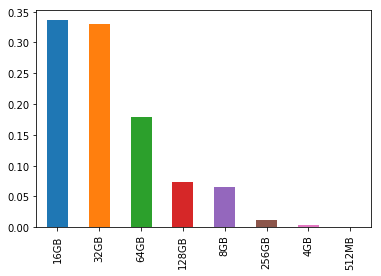

In [10]:
productosStorageGraf = viewedProduct.storage.value_counts(normalize = True)
#print(productosStorageGraf)
productosStorageGraf.plot(kind = 'bar')

**Conclusión de los productos que visitó el usuario sobre el almacenamiento de los productos: ** 
    
    - El 33% visita productos con almacenamiento de 16 GB
    - El 32% visita productos con almacenamiento de 32 GB
    - El 17% visita productos con almacenamiento de 64 GB
    - EL 6% visita productos con almacenamiento de 8 GB
    

**¿Cuál es el color de los modelos que los usuarios visitaron?**

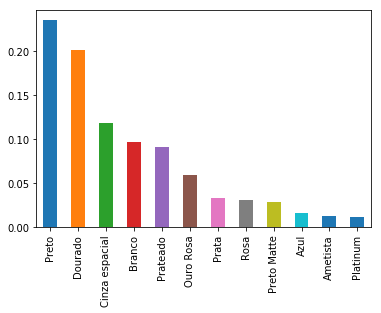

In [11]:
productosColorGraf = viewedProduct.color.value_counts(normalize = True).head(12)
#print(productosColorGraf)
productosColorGraf.plot(kind = 'bar')

**Conclusión de los productos que visitó el usuario sobre el color de los productos:**
    - el 23% de los productos son negro
    - el 20% de los productos son dorados
    - el 11% de los productos son gris espacial
    - ... completar

**¿En qué momento del día los usuarios visitaron los modelos?**

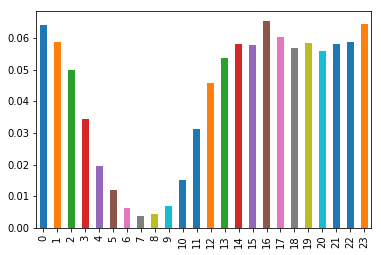

In [18]:
productosTimeStampGraf = viewedProduct.hora.value_counts(normalize = True, sort = False)
productosTimeStampGraf.plot(kind = 'bar')

**Conclusión sobre a qué hora se visitan los modelos **

Los modelos se visitan más frecuentemente entre las 14hs y las 2hs.

**¿Qué días se visitaron más productos?**

Tuesday      0.170930
Wednesday    0.162689
Thursday     0.161450
Friday       0.147367
Monday       0.146811
Saturday     0.114028
Sunday       0.096725
Name: nombreDelDia, dtype: float64


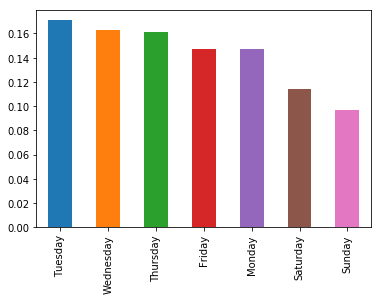

In [26]:
productosTimeStampGraf = viewedProduct.nombreDelDia.value_counts(normalize = True)
print(productosTimeStampGraf)
productosTimeStampGraf.plot(kind = 'bar')
#PREGUNTAR COMO ORDENAR ESTO POR DÍA DE LA SEMANA

**Conclusión sobre qué día visitaron más los productos:**

    -El día que menos productos se visitan son los domingos, seguido por los sábados

**¿En qué meses se visitaron más productos?**

1    0.016734
2    0.026714
3    0.074993
4    0.124674
5    0.478913
6    0.277972
Name: mes, dtype: float64


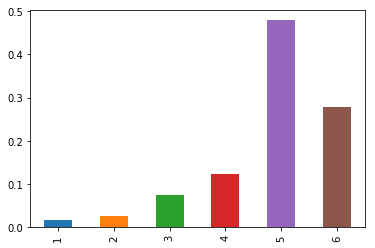

In [24]:
productosTimeStampGraf = viewedProduct.mes.value_counts(normalize = True, sort = False)
print(productosTimeStampGraf)
productosTimeStampGraf.plot(kind = 'bar')
#modificar el plot para ver el nombre del mes

**Conclusión sobre el mes en el que más se visitaron productos:**

  -el 47% de los productos se visitaron en Mayo
  
  -el 27% de los productos se visitaron en Junio (cayó respecto a Mayo)
  
  -el 13% de los productos se visitaron en Abril
  
  -el 7% de los productos se visitaron en marzo
  
  -el 2% de los productos se visitaron en Febrero
  
  -el 1% de los productos se visitaron en Enero


### Brand Listing

En brand listing había 311 skus nulls que, en mi opinión son observaciones invalidas porque brand lisiting es el evento que representa: El usuario visita un listado específico de una marca viendo un conjunto de productos.Y skus representa: Identificador de producto relacionado al evento.

**¿Cuáles fueron los skus más buscados?**

Skus es una lista de sku. Cada sku representa un modelo. Cada skus representa una marca.

In [81]:
productos = tf.loc[:,['model','sku','storage','color','condition']]
productos = productos.dropna() #este tfframe tiene todos los productos. Cada producto es 
#diferente segun modelo, storage, color y condición. Cada uno tiene un sku diferente.
productos = productos.drop_duplicates()
marcas = brandListing['skus'].str.split(",",expand = True)
#marcas[0].value_counts() #hay 1400 marcas
marcas.head()
#NO SE CÓMO SE PUEDE HACER UN ANÁLISIS POR MARCA. SON MUCHAS 
#COMO PARA IDENTIFICARLAS POR PRODUCCTO MANUALMENTE

,0,1,2,3,4,5,6,7,8,9,10,11
12,5075,12536,12520,12661,12506,12549,10449,9175,9218,7825,2929,8567
14,5075,12536,12520,12661,12506,12549,10449,9175,9218,7825,2929,8567
20,8499,8485,8471,8443,None,None,None,None,None,None,None,None
24,2694,2711,6011,5904,6931,2830,6023,10294,3647,2710,9988,3635
25,6931,6888,6847,6957,6902,6832,6581,6875,8965,8980,8952,None


### Visited site

**channel:** Tipo de canal desde donde se originó el evento.

**new_vs_returning:** Indicador de si el evento fue generado por un usuario nuevo (New) o por un usuario que previamente había visitado el sitio (Returning) según el motor de analytics.

**city |region | country**

**device_tipe:** Tipo de dispositivo desde donde se genero el evento.

**screen resolution:** Resolución de pantalla que se está utilizando en el dispositivo
desde donde se genero el evento.

**operating system version:** Version de sistema operativo desde donde se origino el
evento.

**browser version:** Versión del browser utilizado en el evento

In [84]:
visitedSite.channel.value_counts() #NO SÉ A QUÉ SE REFIERE CON CHANNEL

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

**¿Cuánta gente es nueva? ¿Cuánta gente volvió?**

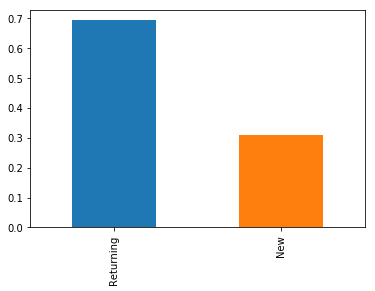

In [90]:
newVsRetruningGraf = visitedSite.new_vs_returning.value_counts(normalize = True)
#print(newVsRetruningGraf)
newVsRetruningGraf.plot(kind = "bar")

**Conclusión**:
    -El 69% de la gente volvió
    -El 39% de la gente es nueva

**¿Desde qué dispositivo acceden los usuarios?**

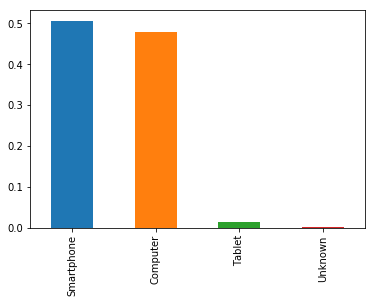

In [94]:
deviceTypeGraf = visitedSite.device_type.value_counts(normalize = True)
#print(deviceTypeGraf)
deviceTypeGraf.plot(kind = "bar")

**Conclusión:**

    -El 50% accede desde su teléfono
    -El 47% accede desde su computadora
    -El 1% accedde desde su tablet

**¿Desde qué sistema operativo acceden los usuarios?**

In [101]:
operatingSystemVersion = visitedSite.operating_system_version
#operatingSystemVersion.loc[operatingSystemVersion.str.contains('Windows'),:]
##operatingSystemVersion.plot(kind = "bar")
#hay 121 sistemas operativos

IndexingError: Too many indexers

## LUCAS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npy
import seaborn as sb

tf = pd.read_csv('../../tf/events.csv', low_memory=False)

tf['fecha'] = pd.to_datetime(tf['timestamp'], errors='coerce')
tf['mes'] = tf['fecha'].dt.month

# Pantallazo general a los eventos
Aquí intentaré sacar conclusiones generales de cómo se comportan los eventos. Cuáles son los más frecuentes, los menos y y por qué.

In [3]:
tf.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
eventos_mas_populares = tf.event.value_counts()
eventos_mas_populares

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

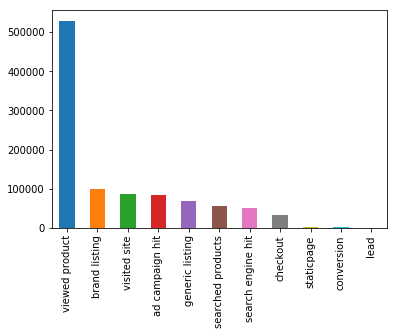

In [8]:
eventos_mas_populares.plot(kind = 'bar')

## Quiero saber los eventos más frecuentes segun pais/region/ciudad

In [23]:
eventos_mas_populares_por_pais = tf.groupby('country')['event'].value_counts()
eventos_mas_populares_por_pais

country             event       
Algeria             visited site        1
Angola              visited site        2
Argentina           visited site       94
Bangladesh          visited site        4
Belize              visited site        1
Brazil              visited site    84308
Canada              visited site       35
Cape Verde          visited site        1
China               visited site        1
Colombia            visited site        4
Denmark             visited site        1
Dominican Republic  visited site        6
France              visited site       13
French Guiana       visited site        8
Germany             visited site        5
Guadeloupe          visited site        6
India               visited site        2
Ireland             visited site        1
Israel              visited site        1
Italy               visited site        7
Japan               visited site       11
Mexico              visited site        1
Morocco             visited site        2
M

El único evento en dónde se involucra el campo 'country' es 'visited site', por lo que sólo conozco el pais mediante el cual las personas visitan el sitio.

Quiero saber si ocurre lo mismo con el campo 'city' y con el campo 'region'

In [25]:
eventos_mas_populares_por_city = tf.groupby('city')['event'].value_counts()
eventos_mas_populares_por_city

city                    event       
Abadiania               visited site      2
Abaete                  visited site      5
Abaetetuba              visited site      4
Abrantes                visited site      2
Abreu e Lima            visited site     35
Acailandia              visited site     42
Acajutiba               visited site      1
Acarau                  visited site     20
Acegua                  visited site      1
Acu                     visited site      2
Adamantina              visited site      6
Adolfo                  visited site      1
Afogados da Ingazeira   visited site     46
Afonso Claudio          visited site      6
Agrestina               visited site      3
Agronomica              visited site      1
Agua Boa                visited site      4
Agua Branca             visited site      4
Agua Doce               visited site      1
Aguai                   visited site      7
Aguas Belas             visited site     10
Aguas Lindas            visited site   

In [27]:
eventos_mas_populares_por_region = tf.groupby('region')['event'].value_counts()
eventos_mas_populares_por_region

region                      event       
Acre                        visited site       96
Aichi                       visited site       11
Alagoas                     visited site      751
Amapa                       visited site      148
Amazonas                    visited site      600
Arkansas                    visited site        1
Asuncion                    visited site        2
Bahia                       visited site     5737
Basel-City                  visited site        3
British Columbia            visited site        6
Buenos Aires                visited site        5
Buenos Aires F.D.           visited site       76
California                  visited site      199
Castelo Branco              visited site        1
Ceara                       visited site     2829
Cidade de Maputo            visited site        8
Colorado                    visited site       10
Connecticut                 visited site       11
Cordoba                     visited site        2
Delaware 

### Conclusiones
Los campos 'country', 'region' y 'city' solo están activos cuando el evento es 'visited site'.
Intentaré determinar qué ciudades, regiones y países son las que generan más visitas.

Las visitas más relevantes provienen de brasil, estados unidos y 'unknown'. Despreciaré el resto de los países ya que no aportan información sustancial al análisis.

### Cantidad de visitas por ciudad de Brasil

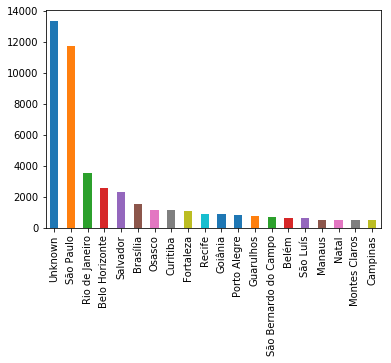

In [57]:
eventos_mas_visitados_en_brasil = tf[tf['country'] == 'Brazil']
ciudades = eventos_mas_visitados_en_brasil['city'].value_counts()
ciudades.head(20).plot(kind = 'bar')

### Cantidad de visitas por mes del 2018

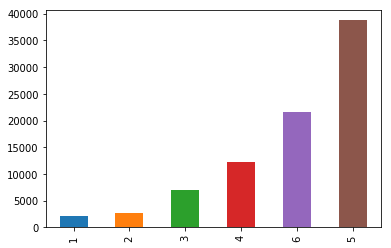

In [66]:
eventos_mas_populares_por_mes = eventos_mas_visitados_en_brasil['mes'].value_counts()
eventos_mas_populares_por_mes.sort_values().plot(kind = 'bar')

La mayor cantidad de datos proviene de localizaciones desconocidas, sin embargo tenemos una fuerte presencia en **Sao Paulo** seguido de **Rio de Janeiro**

### Eventos más populares a lo largo de los meses

In [28]:
progreso_de_eventos = tf.groupby(['mes', 'event']).size().to_frame('size')
progreso_de_eventos['log_size'] = npy.log10(progreso_de_eventos['size'])
graf = progreso_de_eventos['log_size'].unstack()
graf

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
mes,,,,,,,,,,,
1,3.230960,3.290702,2.519828,1.799341,3.235781,1.505150,3.001301,3.127429,2.139879,3.946992,3.329398
2,3.369216,3.491502,2.644439,1.869232,3.309204,1.342423,3.126456,3.178113,2.021189,4.150142,3.445604
3,3.837083,3.928857,3.141763,2.423246,3.744528,1.838849,3.516800,3.603144,2.652246,4.598418,3.860158
4,4.036948,4.180499,3.293363,2.499687,3.995679,2.133539,3.751356,3.830011,2.814913,4.819175,4.102091
5,4.581016,4.653126,4.194376,2.545307,4.483901,1.949390,4.384873,4.416274,3.178113,5.403656,4.603545
6,4.360158,4.397036,4.145103,2.012837,4.251614,2.000000,4.188338,4.214208,2.872739,5.167400,4.350616


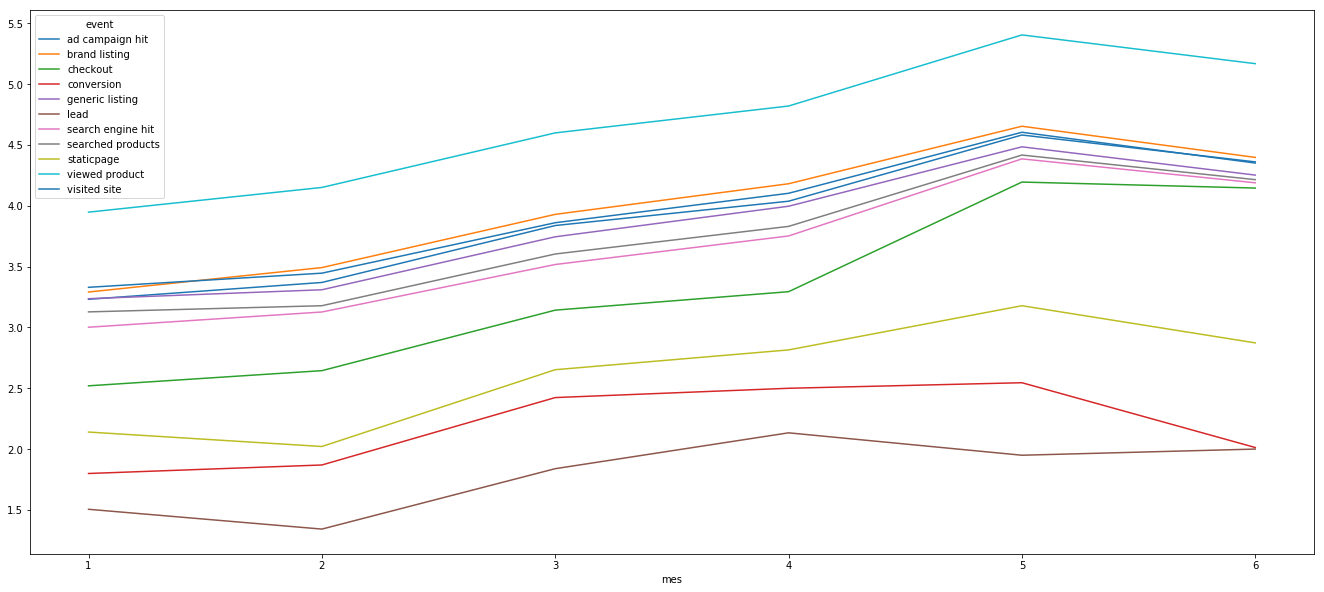

In [29]:
graf.plot(figsize = (23, 10))

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

tf = pd.read_csv('../../tf/events.csv', low_memory=False)

tf['fecha'] = pd.to_datetime(tf['timestamp'], errors='coerce')
tf['mes'] = tf['fecha'].dt.month

sns.set(style="white", context="talk")

## Análisis de productos
Revisaré cuáles son los productos más visitados, más vendidos

### Producto más vendido

Text(0,0.5,'Cantidad de ventas')

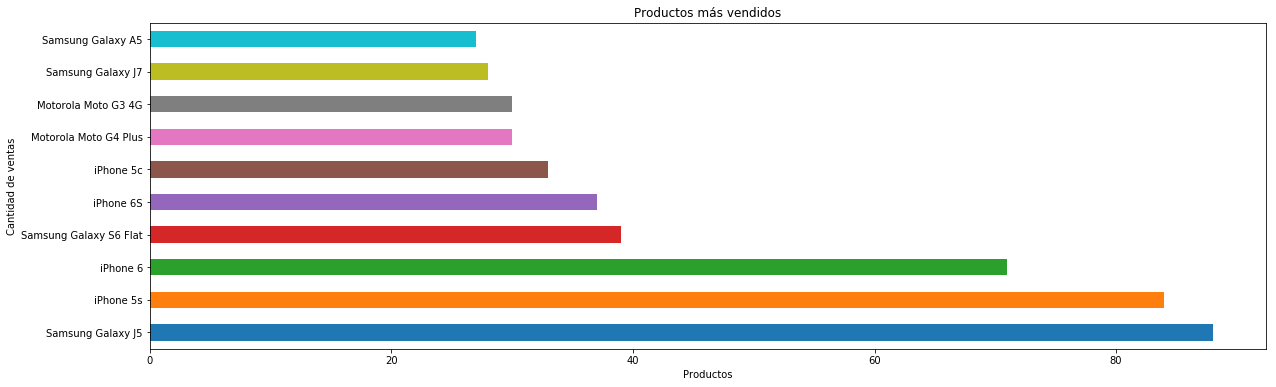

In [36]:
productos_mas_vendidos = tf[tf['event'] == 'conversion']
graf = productos_mas_vendidos['model'].value_counts().head(10).plot(kind = 'barh', figsize = (20, 6))
graf.set_title('Productos más vendidos')
graf.set_xlabel('Productos')
graf.set_ylabel('Cantidad de ventas')

### Producto más visitado

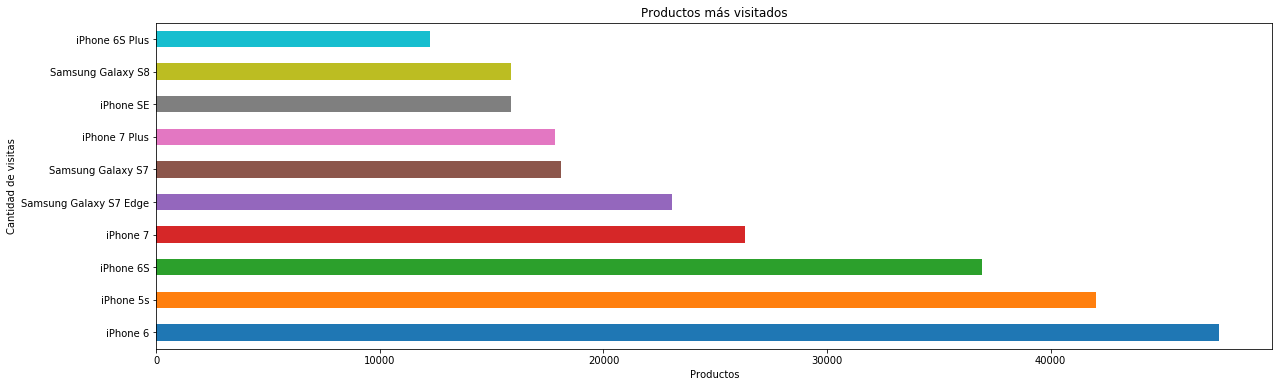

In [35]:
productos_mas_visitados = tf[tf['event'] == 'viewed product']
graf = productos_mas_visitados['model'].value_counts().head(10).plot(kind = 'barh', figsize = (20, 6))
graf.set_title('Productos más visitados')
graf.set_xlabel('Productos')
graf.set_ylabel('Cantidad de visitas')
graf.set_facecolor('w')

** Los colores no coinciden en ambos gráficos. Ojo **

### Productos con mayor porcentaje de convertibilidad en base a la visita

In [236]:
productos_mas_convertidos = tf.groupby('model')['event'].value_counts().to_frame('cantidad').reset_index()
productos_mas_convertidos = productos_mas_convertidos[(productos_mas_convertidos['event'] == 'viewed product')  | (productos_mas_convertidos['event'] == 'conversion')]

productos_mas_convertidos = productos_mas_convertidos.set_index(['model', 'event']).unstack()
